Пет-проект: Авторынок Казахстана

## Цель проекта:
Провести анализ рынка автомобилей Казахстана

Задачи проекта:
   1. Обработать сырые данные.
   2. Провести исследовательский анализ данных.
   3. Провести анализ авторынка Казахстана.

### План:
1. Описание данных
2. Загрузка данных и подготовка их к анализу
- Общая информация по датафрейму
- Проверить корректность наименований колонок
- Исследовать соответствие типов
- Проверка данных на наличие дубликатов

3. Расчет числа Лемтюгова
4. Визуализация графа
5. Проверка статистических гипотез
6. Выводы

## Описание данных

Описание данных (продажи автомобилей в Казахстане 2019 год)

- Год – год продажи (2019)
- Месяц – месяц продажи (январь - сентябрь)
- Компания – название автоцентра
- Бренд – название продаваемой марки автомобиля
- Модель – название модели автомобиля
- Модификация – модификация модели автомобиля (удаляем)
- Год выпуска – год производства автомобиля
- Страна-производитель – страна, где произведен автомобиль
- Вид топлива – бензин, дизель, электричество, гибрид
- Объём двиг л – объем двигателя автомобиля в литрах
- Коробка передач – тип коробки переключения передач
 (оставляем два варианта: автоматическая, механическая, то есть все что не механика ставим автомат, на DSG, S-Tronic и прочее делить не надо, равно как и количество передач)
- Тип привода – в итоге оставляем RWD – задний привод, FWD – передний привод, 4WD – полный привод, 2WD – все остальное (подключаемый полный привод и где нет четкого указания передний или задний это привод)
- Сегмент – сегмент, к которому относится авто (удаляем)
- Регион – регион продажи
- Наименование дилерского центра – совпадает с компанией – можно удалить
- Тип клиента – юридическое или физическое лицо (в рамках анализа не критично – можно удалить)
- Форма расчета – наличный и безналичный расчет (много пропусков – можно удалять)
- Количество – количество автомобилей в заказе
- Цена USD – цена автомобиля
- Продажа USD – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)
- Область – область продажи
- Сегментация 2013 – сегмент автомобиля актуальный
- Класс 2013 – класс автомобиля актуальный
- Сегментация Eng – английская сегментация (удаляем)
-Локализация производства – удаляем (совпадает со страной производителем)

Признаки-категории:
- сегмент
- класс
- тип привода
- коробка передач

## Загрузка данных и подготовка их к анализу

In [475]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta as dt

#Библиотека для парсинга json
import json

#Основные графические библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#request - чтобы подтягивать информацию с других сайтов - используется в функции отрисовки sankey чарта
import requests

#Для отображения прогресса - используется в функции отрисовки sankey чарта
from tqdm import tqdm

from os import replace

#Для работы с матрицей вместо графа
import scipy
from scipy.sparse import csr_matrix


# для гипотез
from scipy import stats as st


In [2]:
!pip install q phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 5.7 MB/s eta 0:00:00


In [3]:
#матрица корреляции
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [478]:
#загрузка данных
data = pd.read_csv('/content/drive/MyDrive/kz_2019_final_all_dirt.csv', index_col=0)

<ipython-input-478-845c55ff7964>:2: DtypeWarning:

Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.



In [479]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Общая информация по датафрейму

In [480]:
data.head(1)#выведем первую строку датафрейма


,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,S-tronic,NaN,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,31250.0,31250.0,г.Алматы,Легковые автомобили,C класс,C,Импорт


In [481]:
data.info()#информация по датафрейму

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             32854 non-null  int64  
 1   Месяц                           32854 non-null  object 
 2   Компания                        32854 non-null  object 
 3   Бренд                           32854 non-null  object 
 4   Модель                          32854 non-null  object 
 5   Модификация                     29729 non-null  object 
 6   Год выпуска                     32700 non-null  object 
 7   Страна-производитель            32854 non-null  object 
 8   Вид топлива                     31942 non-null  object 
 9   Объём двиг, л,                  30968 non-null  object 
 10  Коробка передач                 31662 non-null  object 
 11  Тип привода                     30589 non-null  object 
 12  Сегмент                         

32854 строк в датафрейме, есть пропуски

Приведем названия столбцов к snake_case

In [482]:

data.columns = (data.columns.str.lower().str.replace(',','').str.replace('-','_').str.replace(' ','_'))

In [483]:
data.columns #столбцы

Index(['год', 'месяц', 'компания', 'бренд', 'модель', 'модификация',
       'год_выпуска', 'страна_производитель', 'вид_топлива', 'объём_двиг_л',
       'коробка_передач', 'тип_привода', 'сегмент', 'регион',
       'наименование_дилерского_центра', 'тип_клиента', 'форма_расчета',
       'количество', 'цена_usd', 'продажа_usd', 'область', 'сегментация_2013',
       'класс_2013', 'сегментация_eng', 'локализация_производства'],
      dtype='object')

### Проверка тип данных в столбцах

In [484]:
pd.set_option('display.max_columns', None) #отображение всех столбцов
data.head(1) #выведем 1ю строку

,год,месяц,компания,бренд,модель,модификация,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,наименование_дилерского_центра,тип_клиента,форма_расчета,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,сегментация_eng,локализация_производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,S-tronic,NaN,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,31250.0,31250.0,г.Алматы,Легковые автомобили,C класс,C,Импорт


Логично заменить тип данных в столбцах:
- "год_выпуска" на целое число
- "объём_двиг_л"  на вещественное число
- "количество" на целое число

"цена_usd" и "продажа_usd" можно округлить и изменить тип на целое число


 Удалить Проверим значения в важных столбцах, нет ли равных 0.

### Пропуски

In [485]:
#функция для подсчета пропусков в столбцах
def isna_data(df):
   display(pd.concat(
    [
        df.isna().sum(),#считаем пропуски
        df.isna().mean().apply('{:.2%}'.format)# считаем количество пропусков в %
    ], axis=1,
    keys=['nan_count', 'nan_share']
).sort_values(by='nan_count', ascending=False)
)

isna_data(data)

,nan_count,nan_share
форма_расчета,25775,78.45%
тип_клиента,5730,17.44%
сегмент,4788,14.57%
модификация,3125,9.51%
тип_привода,2265,6.89%
объём_двиг_л,1886,5.74%
коробка_передач,1192,3.63%
вид_топлива,912,2.78%
год_выпуска,154,0.47%
количество,5,0.02%


Удалим столбцы, в которых много пропусков либо они не нужны нам для анализа:

In [486]:
data = data.drop(columns=['модификация', 'локализация_производства','форма_расчета', 'сегментация_eng', 'наименование_дилерского_центра'])


## Детально рассмотрим каждый столбец

#### Столбец год

In [487]:
data['год'].unique() #уникальные значения

array([2019])

#### Столбец месяц

In [488]:
data['месяц'].unique()#уникальные значения

array(['Март', 'Май', 'Июнь', 'Июль', 'Январь', 'Февраль', 'Апрель',
       'Август', 'Сентябрь'], dtype=object)

#### Столбец компания

In [489]:
data['компания'].value_counts()#выведем уникальные значения в столбце и их частоту повторов

Toyota Motor Kazakhstan          10442
Astana Motors                     5746
БИПЭК АВТО                        3595
Вираж                             3358
УзАвто-Казахстан                  1727
Allur Auto                        1359
Renault Россия                    1088
Nissan Manufacturing RUS          1037
Mercur Auto                        940
ТК КАМАЗ                           888
Лифан Моторс Рус                   566
Subaru Kazakhstan                  520
ММС Рус                            279
Автоцентр-Бавария                  198
СВС                                184
Каспиан Моторс                     168
Jaguar Land Rover                  164
Autokapital                        156
Автомир ГК                         111
СемАЗ                               70
MMC RUS                             33
Хино Моторс Казахстан               31
Алматы АТО                          30
Hyundai Com Trans Kazakhstan        28
Eurasia Motor Premium               24
Scandinavian Motors      

Hino Motors Kazakhstan и Хино Моторс Казахстан объеденим - это одна и та же компания.

С ММС Рус и ММС RUS тоже самое:

In [490]:
data['компания'] = data['компания'].str.replace('Hino Motors Kazakhstan','Хино Моторс Казахстан')
data['компания'] = data['компания'].str.replace('MMC RUS','ММС Рус')

In [491]:
data['компания'].value_counts()#выведем уникальные значения в столбце и их частоту повторов

Toyota Motor Kazakhstan          10442
Astana Motors                     5746
БИПЭК АВТО                        3595
Вираж                             3358
УзАвто-Казахстан                  1727
Allur Auto                        1359
Renault Россия                    1088
Nissan Manufacturing RUS          1037
Mercur Auto                        940
ТК КАМАЗ                           888
Лифан Моторс Рус                   566
Subaru Kazakhstan                  520
ММС Рус                            312
Автоцентр-Бавария                  198
СВС                                184
Каспиан Моторс                     168
Jaguar Land Rover                  164
Autokapital                        156
Автомир ГК                         111
СемАЗ                               70
Хино Моторс Казахстан               33
Алматы АТО                          30
Hyundai Com Trans Kazakhstan        28
Eurasia Motor Premium               24
Scandinavian Motors                 22
СВС-ТРАНС                

#### Столбец бренд

In [492]:
data['бренд'].value_counts()#выведем уникальные значения в столбце и их частоту повторов

Toyota                  9374
Hyundai                 5703
Lada                    2116
GAZ                     2111
Ravon                   1727
Renault                 1332
Lexus                   1068
Jac                     1027
UAZ                      954
Nissan                   948
KAMAZ                    888
Volkswagen               777
Chevrolet                675
Kia                      654
Lifan                    566
Subaru                   520
Mitsubishi               312
Skoda                    252
Isuzu                    199
BMW                      185
Ford                     183
Land Rover               149
Peugeot                  132
Mercedes-Benz            115
Mazda                    111
Iveco                    109
Audi                     103
Infiniti                  89
ANKAI                     75
Hyundai Truck & Bus       67
Porsche                   60
Mercedes-Benz Trucks      41
Shacman                   36
Hino                      33
Volvo         

#### Столбец модель

In [493]:
data['модель'].unique()# выведем уникальные значения

array(['A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Q5', 'Q7', '1 серия',
       '2 серия', '3 серия', '4 серия', '5 серия', '6 серия', '7 серия',
       'i3', 'X1', 'X3', 'X4', 'X5', 'X6', 'Aveo', 'Captiva', 'Niva',
       'Tahoe', 'Tracker', 'BS 106 A', 'EcoSport', 'Explorer', 'Fiesta',
       'Focus', 'Kuga', 'Mondeo', 'Transit', 'Transit Custom',
       'BJ1032V3JB3-S', 'BJ3143DKPGA-1', 'BJ3253DMPKB-AD',
       'BJ5032V3BB3-S', 'BJ5163VKCHN-1', '2217', '2310', '2705', '2752',
       '3221', '3302', '3308', '3309', 'Next', 'Accent', 'Creta',
       'Elantra', 'Genesis G90', 'Grandeur', 'Santa Fe', 'Sonata',
       'TQ-1/H-1', 'County', 'H350', 'HD 160', 'HD 170', 'HD 260',
       'HD 65', 'HD 72', 'HD 78', 'Universe', 'Tucson', 'Q30', 'Q50',
       'QX30', 'QX50', 'QX60', 'QX70', 'QX80', 'D-MAX', 'FVR34', 'NMR',
       'NPR', 'NQR71', 'Daily', 'Daily A', 'Daily V', 'Stralis', 'Tipper',
       'S3', 'S5', 'F-Pace', 'XE', 'XF', '4308', '43114', '43118',
       '43253', '43502', '44108', '4514

In [494]:
len(data['модель'].value_counts())#количество значений

294

#### Столбец год выпуска

In [495]:
data['год_выпуска'].unique()# выведем уникальные значения

array(['2017', '2018', '2016', '2011', '2015', nan, '2014', '2013',
       '2012', '2\xa0018', '2\xa0017', '2\xa0016', 2018, 2017, 2015, 2016],
      dtype=object)

In [496]:
# избавимся от спецсимволов в столбце
data['год_выпуска'] = data['год_выпуска'].replace({'2\xa0016': '2016', '2\xa0017': '2017','2\xa0018': '2018'}, regex=True)


In [497]:
data['год_выпуска'].unique()# выведем уникальные значения, проверим замену

array(['2017', '2018', '2016', '2011', '2015', nan, '2014', '2013',
       '2012', 2018, 2017, 2015, 2016], dtype=object)

Рассмотрим пропуски в столбце

In [498]:
data[(data['год_выпуска'].isna())]# выведем строки, в которых в столбце "год" пропуски

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013
1157,2019,Январь,СемАЗ,Foton,BJ3253DMPKB-AD,NaN,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,Алматы,NaN,18.0,55297.208072,995349.745301,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики
7144,2019,Сентябрь,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,HD 78,NaN,Республика Казахстан,Дизель,3.9,NaN,2WD,среднетоннажные,Алматы,NaN,1.0,31981.547220,31981.547220,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики
9163,2019,Май,СВС,Isuzu,D-MAX,NaN,Таиланд,Дизель,NaN,NaN,4х4,NaN,Алматы,NaN,1.0,33218.541432,33218.541432,г.Алматы,Пикапы,Pick-ups
9164,2019,Май,СВС,Isuzu,D-MAX,NaN,Таиланд,Дизель,NaN,NaN,4х4,NaN,Алматы,NaN,1.0,33218.541432,33218.541432,г.Алматы,Пикапы,Pick-ups
9165,2019,Май,СВС,Isuzu,D-MAX,NaN,Таиланд,Дизель,NaN,NaN,4х4,NaN,Алматы,NaN,1.0,33218.541432,33218.541432,г.Алматы,Пикапы,Pick-ups
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32219,2019,Май,Автомир ГК,Mazda,CX-9,NaN,Российская Федерация,NaN,NaN,NaN,NaN,NaN,Караганда,NaN,1.0,55919.909792,55919.909792,Карагандинская область,Внедорожники,Полноразмерные SUV
32220,2019,Май,Автомир ГК,Mazda,CX-9,NaN,Российская Федерация,NaN,NaN,NaN,NaN,NaN,Астана,NaN,2.0,55919.909792,111839.819584,г.Астана,Внедорожники,Полноразмерные SUV
32221,2019,Июнь,Автомир ГК,Mazda,CX-9,NaN,Российская Федерация,NaN,NaN,NaN,NaN,NaN,Караганда,NaN,1.0,54597.119733,54597.119733,Карагандинская область,Внедорожники,Полноразмерные SUV
32222,2019,Июнь,Автомир ГК,Mazda,CX-9,NaN,Российская Федерация,NaN,NaN,NaN,NaN,NaN,Астана,NaN,1.0,54597.119733,54597.119733,г.Астана,Внедорожники,Полноразмерные SUV


Пока не будем удалять, но при анализе учтем, что есть пропуски

#### Столбец страна производитель

In [499]:
data['страна_производитель'].unique()#уникальные значения

array(['Германия', 'США', 'Республика Казахстан', 'Российская Федерация',
       'Белоруссия', 'Турция', 'Япония', 'Корея', 'Вьетнам', 'UK',
       'Таиланд', 'Узбекистан', 'Венгрия', 'Австрия', 'Нидерланды',
       'Швеция'], dtype=object)

Закодируем страны для удобства

In [500]:
# словарь обозначений
cleanup_nums = {"страна_производитель":{"Германия": "DEU", "США": "USA", "Республика Казахстан":"KZ", "Российская Федерация":"RUS",\
                                        "Белоруссия": "BLR", "Турция":"TUR", "Япония":"JPN", "Корея":"KOR", "Вьетнам":"VNM",\
                                        "Таиланд":"THA", "Узбекистан":"UZB", "Венгрия":"HUN", "Австрия":"AUT", "Нидерланды":"NLD", "Швеция":"SWE"}}

In [501]:
data = data.replace(cleanup_nums)# замена значений

In [502]:
data['страна_производитель'].unique()# выведем уникальные, проверим замену

array(['DEU', 'USA', 'KZ', 'RUS', 'BLR', 'TUR', 'JPN', 'KOR', 'VNM', 'UK',
       'THA', 'UZB', 'HUN', 'AUT', 'NLD', 'SWE'], dtype=object)

#### Столбец вид топлива

In [503]:
data['вид_топлива'].unique()# выведем уникальные

array(['Бензин', 'Дизель', 'гибрид', 'Электрический', nan, '0', 'дизель ',
       'Газовый'], dtype=object)

In [504]:
data['вид_топлива'] = (data['вид_топлива'].str.lower().str.replace(' ',''))#приведем названия к строчным буквам, удалим пробелы в названиях

In [505]:
data['вид_топлива'].unique()# выведем уникальные, проверим замену

array(['бензин', 'дизель', 'гибрид', 'электрический', nan, '0', 'газовый'],
      dtype=object)

In [506]:
data.loc[(data['вид_топлива']== '0')]# выведем строки, в которых в столбце "вид_топлива" 0


,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013
19519,2019,Февраль,Renault Россия,Renault,Kaptur,2018,RUS,0,1.6,CVT,NaN,NaN,Петропавловск,NaN,1.0,18154.706431,18154.706431,Северо-Казахстанская область,Внедорожники,Субкомпактные SUV
19732,2019,Февраль,Renault Россия,Renault,Koleos,2017,RUS,0,0,0,NaN,NaN,Караганда,NaN,1.0,34690.897794,34690.897794,Карагандинская область,Внедорожники,Компактные SUV
19733,2019,Февраль,Renault Россия,Renault,Koleos,2017,RUS,0,0,0,NaN,NaN,Астана,NaN,1.0,34690.897794,34690.897794,г.Астана,Внедорожники,Компактные SUV
19953,2019,Февраль,Renault Россия,Renault,Sandero,2018,RUS,0,0,0,NaN,NaN,Астана,NaN,1.0,14137.931034,14137.931034,г.Астана,Легковые автомобили,B класс


Удалим строки, есть пропуски и в других важных столбцах:

In [507]:
data = data.loc[~(data['вид_топлива']== '0')]

In [508]:
data.loc[(data['вид_топлива'].isna())].groupby('сегментация_2013')['сегментация_2013'].count()

сегментация_2013
Внедорожники                442
Коммерческие автомобили     159
Легковые автомобили         297
Минивэны                      2
Пикапы                       12
Name: сегментация_2013, dtype: int64

In [509]:
data[(data['вид_топлива'].isna())].groupby('бренд')['модель'].count()

бренд
Foton                   12
Hyundai Truck & Bus      1
Infiniti                 3
Isuzu                   28
Jaguar                  11
Lada                    19
Land Rover              74
Lexus                    9
Mazda                   78
Renault                526
Shacman                 36
UAZ                     18
Volkswagen              75
Урал                    22
Name: модель, dtype: int64

#### Столбец объем двигателя

In [510]:
data['объём_двиг_л'].unique()# выведем уникальные

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.9', '4.6', '3,5', '5.7', '10.5', '6.7', '2/2,5',
       '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3',
       '0.002', '0.0016', '1998', '13', '16', '1400', '2.3', '1.33',
       '2,4G', '2.693', '2693', '2.235', '2235', '2.0', '14860', '14.8',
       '17.5', '1,2T', '4.88', 4.88, 4.0, 2.0, 6.6, 7.8, 2.8, 3.6],
      dtype=object)

Для начала проверим значения меньше 1 и больше 10. Убедимся, что это ошибка в единицах измерения. (оставлю только вывод проверки)

In [511]:
data.loc[data['объём_двиг_л']=='2400']

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013
397,2019,Июль,БИПЭК АВТО,Chevrolet,Captiva,2018,KZ,бензин,2400,6 АТ,Полный,Внедорожники,Уральск,NaN,1.0,24400.0,24400.0,Западно-Казахстанская область,Внедорожники,Среднеразмерные SUV
398,2019,Июль,БИПЭК АВТО,Chevrolet,Captiva,2018,KZ,бензин,2400,6 АТ,Полный,Внедорожники,Семей,NaN,2.0,24400.0,48800.0,Восточно-Казахстанская область,Внедорожники,Среднеразмерные SUV
399,2019,Июль,БИПЭК АВТО,Chevrolet,Captiva,2018,KZ,бензин,2400,6 АТ,Полный,Внедорожники,Петропавловск,NaN,1.0,24400.0,24400.0,Северо-Казахстанская область,Внедорожники,Среднеразмерные SUV
400,2019,Июль,БИПЭК АВТО,Chevrolet,Captiva,2018,KZ,бензин,2400,6 АТ,Полный,Внедорожники,Костанай,NaN,1.0,24400.0,24400.0,Костанайская область,Внедорожники,Среднеразмерные SUV
401,2019,Июль,БИПЭК АВТО,Chevrolet,Captiva,2018,KZ,бензин,2400,6 АТ,Полный,Внедорожники,Алматы,NaN,1.0,24400.0,24400.0,г.Алматы,Внедорожники,Среднеразмерные SUV


Объем записывали в разных единицах измерения, отсюда такие значения: л, см3, м3. Приведем все данные к литрам.

Создадим новый столбец объем двигателя V, сначала почистим данные

In [512]:
data['объём_двиг_л'] = data['объём_двиг_л'].str.replace(',','.', regex=True)#заменим "," на "."
data['объём_двиг_л'].unique()# выведем уникальные, проверим замену

<ipython-input-512-b607cd845ca8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1.4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1.6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.9', '4.6', '5.7', '10.5', '6.7', '2/2.5', '4',
       '5.5', '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3', '0.002',
       '0.0016', '1998', '13', '16', '1400', '2.3', '1.33', '2.4G',
       '2.693', '2693', '2.235', '2235', '2.0', '14860', '14.8', '17.5',
       '1.2T', '4.88'], dtype=object)

In [513]:
data['объём_двиг_л'] = data['объём_двиг_л'].replace('14860', '14.860',regex=True)#заменим значение

In [514]:
data['объём_двиг_л'] = data['объём_двиг_л'].replace(r'^(\d)(\d{3})', r'\1.\2', regex=True)#добавим точку в числа, в которых 4 знака
data['объём_двиг_л'] = data['объём_двиг_л'].replace(r'\.0+$', '', regex=True)#удалим 0 после ","

data['объём_двиг_л'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '2.4', '2.400', '1.7', '6.2', '1.800', '1.400 turbo', '1.4 Turbo',
       '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5', '3.9', '7.5',
       '11', '3.933', '12.3', '1.6 T-GDI', '3.7', '5.6', '7.8', '2.9',
       '5.2', '10.3', '8.7', '1.600', '1.998', '1.598', '1.248', '2.359',
       '1.999', '3.8', '3.800', '1.591', '1.368', '3.342', '3.47',
       '3.470', '1.69', '1.690', '1.774', '4.9', '4.6', '5.7', '10.5',
       '6.7', '2/2.5', '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5',
       '1.25', '1.3', '0.002', '0.0016', '13', '16', '1.400', '2.3',
       '1.33', '2.4G', '2.693', '2.235', '14.860', '14.8', '17.5', '1.2T',
       '4.88'], dtype=object)

In [515]:
# Создаем функцию для преобразования значений столбца, удалим 0 на конце числа
def remove_zeros(value):
    if isinstance(value, float):
        value = str(value)
    if '.' in value:
        parts = value.split('.')
        decimal_part = parts[1].rstrip('0')  # Удаление нулей справа
        if decimal_part == '':
            return parts[0]
        else:
            return parts[0] + '.' + decimal_part
    return value

data['объём_двиг_л'] = data['объём_двиг_л'].astype(str).apply(remove_zeros)

In [516]:
data['объём_двиг_л'].unique()# выведем уникальные, проверим замену

array(['1.4', '2', '3', '1.5', '4.4', '6.6', 'nan', '0', '1.8', '1.596',
       '2.4', '1.7', '6.2', '1.400 turbo', '1.4 Turbo', '2.5', '1.6',
       '3.5', '2.2', '2.7', '2.8', '4.2', '5', '3.9', '7.5', '11',
       '3.933', '12.3', '1.6 T-GDI', '3.7', '5.6', '7.8', '2.9', '5.2',
       '10.3', '8.7', '1.998', '1.598', '1.248', '2.359', '1.999', '3.8',
       '1.591', '1.368', '3.342', '3.47', '1.69', '1.774', '4.9', '4.6',
       '5.7', '10.5', '6.7', '2/2.5', '4', '5.5', '12', '1.2', '3.6',
       '6.5', '4.5', '1.25', '1.3', '0.002', '0.0016', '13', '16', '2.3',
       '1.33', '2.4G', '2.693', '2.235', '14.86', '14.8', '17.5', '1.2T',
       '4.88'], dtype=object)

Выделим в отдельный столбец признак: турбированный двигатель

In [517]:
data['turbo'] = np.where(data['объём_двиг_л'].str.contains('[тtTТ]', regex=True), 1, 0)

In [518]:
data[(data['turbo']==1)].shape[0]

109

Всего 109 строк, можно не учитывать при анализе

In [519]:
data['v'] = data['объём_двиг_л'].str.replace('[a-zA-Z]', '', regex=True)#создадим новый столбец, в который войдут только числа из значений столбца 'объём_двиг_л'
data['v'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', '', '0', '1.8', '1.596',
       '2.4', '1.7', '6.2', '1.400 ', '1.4 ', '2.5', '1.6', '3.5', '2.2',
       '2.7', '2.8', '4.2', '5', '3.9', '7.5', '11', '3.933', '12.3',
       '1.6 -', '3.7', '5.6', '7.8', '2.9', '5.2', '10.3', '8.7', '1.998',
       '1.598', '1.248', '2.359', '1.999', '3.8', '1.591', '1.368',
       '3.342', '3.47', '1.69', '1.774', '4.9', '4.6', '5.7', '10.5',
       '6.7', '2/2.5', '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5',
       '1.25', '1.3', '0.002', '0.0016', '13', '16', '2.3', '1.33',
       '2.693', '2.235', '14.86', '14.8', '17.5', '4.88'], dtype=object)

In [520]:
data[(data['v']=='2/2.5')]#выведем строки, значения в стобце v = 2/2.5

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v
15568,2019,Май,Автомир ГК,Mazda,6,NaN,RUS,NaN,2/2.5,6AT/MT,FWD,NaN,Караганда,NaN,2.0,26719.288087,53438.576174,Карагандинская область,Легковые автомобили,C класс,0,2/2.5
15569,2019,Май,Автомир ГК,Mazda,6,NaN,RUS,NaN,2/2.5,6AT/MT,FWD,NaN,Караганда,NaN,1.0,26719.288087,26719.288087,Карагандинская область,Легковые автомобили,C класс,0,2/2.5
15570,2019,Май,Автомир ГК,Mazda,6,NaN,RUS,NaN,2/2.5,6AT/MT,FWD,NaN,Караганда,NaN,1.0,26719.288087,26719.288087,Карагандинская область,Легковые автомобили,C класс,0,2/2.5
15571,2019,Май,Автомир ГК,Mazda,6,NaN,RUS,NaN,2/2.5,6AT/MT,FWD,NaN,Астана,NaN,1.0,26719.288087,26719.288087,г.Астана,Легковые автомобили,C класс,0,2/2.5
15572,2019,Май,Автомир ГК,Mazda,6,NaN,RUS,NaN,2/2.5,6AT/MT,FWD,NaN,Астана,NaN,1.0,26719.288087,26719.288087,г.Астана,Легковые автомобили,C класс,0,2/2.5
15573,2019,Май,Автомир ГК,Mazda,6,NaN,RUS,NaN,2/2.5,6AT/MT,FWD,NaN,Астана,NaN,2.0,26719.288087,53438.576174,г.Астана,Легковые автомобили,C класс,0,2/2.5
15613,2019,Май,Автомир ГК,Mazda,CX-5,NaN,RUS,NaN,2/2.5,6AT/MT,2WD/4WD,NaN,Астана,NaN,4.0,28679.182032,114716.728126,г.Астана,Внедорожники,Компактные SUV,0,2/2.5
15614,2019,Май,Автомир ГК,Mazda,CX-5,NaN,RUS,NaN,2/2.5,6AT/MT,2WD/4WD,NaN,Астана,NaN,3.0,28679.182032,86037.546095,г.Астана,Внедорожники,Компактные SUV,0,2/2.5
15615,2019,Май,Автомир ГК,Mazda,CX-5,NaN,RUS,NaN,2/2.5,6AT/MT,2WD/4WD,NaN,Астана,NaN,6.0,28679.182032,172075.092189,г.Астана,Внедорожники,Компактные SUV,0,2/2.5
15616,2019,Май,Автомир ГК,Mazda,CX-5,NaN,RUS,NaN,2/2.5,6AT/MT,2WD/4WD,NaN,Караганда,NaN,5.0,28679.182032,143395.910158,Карагандинская область,Внедорожники,Компактные SUV,0,2/2.5


Значений немного. Точно определить, какой объем двигателя не сможем. Выберем 2 л.

In [521]:
data['v'] = data['v'].str.replace('0.002','2',regex=True)#заменим значение
data['v'] = data['v'].str.replace('0.0016','1.6',regex=True) #заменим значение
data['v'] = data['v'].str.replace('2/2.5','2',regex=True) #заменим значение
data['v'] = data['v'].str.replace(r'\s+|-', '', regex=True) #удалим все дефисы и пробелы
#data['v'].value_counts().head(60)

In [522]:
data[(data['v']=='')].shape[0]# посчитаем пропуски в столбце v

1961

Для удобства обработки изменим тип данных на float, где пропуски, заменим значение на 0, при анализе дальнейшем отфильтруем эти значения

In [523]:
data['v'] = np.where((data['v']==''), 0, data['v'])
data['v'] = data['v'].astype(float)#изменим тип на float

In [524]:
data.loc[data['v']>10]['бренд'].unique()#выведем бренды, для которых объем двигателя больше 10

array(['Hyundai Truck & Bus', 'Iveco', 'MAN', 'Mercedes-Benz Trucks',
       'Scania', 'МАЗ'], dtype=object)

Бренды автомобилей соответствуют большому объему двигателей

Выделим категорий по объему двигателя

In [525]:
volume_labels = ['extra_small', 'small', 'average', 'above_average', 'huge']#зададим категории
volume_bins = [0.1, 1.2, 1.8, 3.5, 6, 20]#определим интервалы значений для категорий
data['v_segment'] = pd.cut(data.v, bins=volume_bins, labels=volume_labels)#создаем столбец с категориями по объему двигателя

In [526]:
data['v_segment'].unique()# выведем уникальные

['small', 'average', 'above_average', 'huge', NaN, 'extra_small']
Categories (5, object): ['extra_small' < 'small' < 'average' < 'above_average' < 'huge']

In [527]:
data.groupby('v_segment')['модель'].count()#посчитаем количество моделей в каждой категории

v_segment
extra_small        149
small            12041
average          16540
above_average     1967
huge               134
Name: модель, dtype: int64

#### Столбец коробка передач

In [528]:
data['коробка_передач'].unique()# выведем уникальные значения

array(['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ', nan,
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '6 МТ',
       '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', 'АКПП6', 'АКПП4',
       '9AT', 'АКПП', 'АКПП8', 'МКПП4', 'МКПП5', 'CVT (вариатор)',
       'CVT(вариATор)', 'CVТ(вариатор)', '6AT/MT', '9АТ', '12AT', '7AT',
       '7АТ', '6М/Т', '6M/T', '6M/Т', '0', 'PDK', '8АКПП', '8-ступ АКПП',
       '8', ' -', '-', '7 DSG', '7DSG', '6 DSG', '6DSG', 'CVТ(вАриАтор)',
       '5MТ', 'АТ (автомат)', '8 AT 4Motion', '8АТ4МoТion', '6A', '5M',
       '6-ступАКПП', '6А', 'AT (автомат)', '7DSG4МoТion', '6Aвтомат',
       '6Aатомат', '5М', '5-ступМТ', 'АT', 'A/T', '7АT', 'МТ (механика

In [529]:
data['коробка_передач'] = (data['коробка_передач'].str.lower().str.replace(' ',''))#удалим пробелы в названиях
data['коробка_передач'].unique()# выведем уникальные значения

array(['s-tronic', 's-тronic', 's-тroic', 's-troic', 'steptronic',
       'тipтronic', 'tiptronic', 'sтepтronic', 'автомат', 'at', '6ат',
       '5мт', '6at', '5mt', 'mt', 'мт', 'mт', '6аt', '6mt',
       'powershifts6', 'powershifтs6', '6мт', '6mт', nan, 'мех.', 'мкпп',
       '8ат', '5at', '5ат', '7dct', '7dcт', 'ат', 'cvt', 'n',
       'cvt(вариатор)', 'cvт', '4ат', '8at', 'amt', '4at', 'акпп6',
       'акпп4', '9at', 'акпп', 'акпп8', 'мкпп4', 'мкпп5', 'cvt(вариatор)',
       'cvт(вариатор)', '6at/mt', '9ат', '12at', '7at', '7ат', '6м/т',
       '6m/t', '6m/т', '0', 'pdk', '8акпп', '8-ступакпп', '8', '-',
       '7dsg', '6dsg', '5mт', 'ат(автомат)', '8at4motion', '8ат4мoтion',
       '6a', '5m', '6-ступакпп', '6а', 'at(автомат)', '7dsg4мoтion',
       '6aвтомат', '6aатомат', '5м', '5-ступмт', 'аt', 'a/t', '7аt',
       'мт(механика)', 'механическая'], dtype=object)

In [530]:
data.loc[(data['коробка_передач']=='0')].shape[0]#количество строк, для которых в столбце "коробка_передач" 0


102

In [531]:
data.loc[(data['коробка_передач']=='-')].shape[0]#количество строк, для которых в столбце "коробка_передач" -

4

In [532]:
data.loc[(data['коробка_передач'].isna())]#.shape[0] строки, для которых в столбце "коробка_передач" пропуски

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment
1154,2019,Март,СемАЗ,Foton,BJ1032V3JB3-S,2015,KZ,NaN,nan,NaN,NaN,NaN,Семей,NaN,10.0,62391.521704,623915.217037,Восточно-Казахстанская область,Коммерческие автомобили,Малотоннажные грузовики,0,0.0,NaN
1155,2019,Февраль,СемАЗ,Foton,BJ3143DKPGA-1,2015,KZ,NaN,nan,NaN,NaN,NaN,Семей,NaN,4.0,92953.770447,371815.081790,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики,0,0.0,NaN
1156,2019,Март,СемАЗ,Foton,BJ3143DKPGA-1,2015,KZ,NaN,nan,NaN,NaN,NaN,Семей,NaN,1.0,22208.077054,22208.077054,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики,0,0.0,NaN
1157,2019,Январь,СемАЗ,Foton,BJ3253DMPKB-AD,NaN,KZ,NaN,nan,NaN,NaN,NaN,Алматы,NaN,18.0,55297.208072,995349.745301,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,0,0.0,NaN
1158,2019,Апрель,СемАЗ,Foton,BJ3253DMPKB-AD,2017,KZ,NaN,nan,NaN,NaN,NaN,Кокшетау,NaN,5.0,55692.307692,278461.538462,Акмолинская область,Коммерческие автомобили,Крупнотоннажные грузовики,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,2019,Сентябрь,СемАЗ,Shacman,SX3258DR384,2018,KZ,NaN,nan,NaN,NaN,NaN,Астана,NaN,3.0,53706.669502,161120.008507,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики,0,0.0,NaN
32604,2019,Июнь,Scania Central Asia,Scania,S-Series,2018,NLD,дизель,13,NaN,NaN,магистральные перевозки,Алматы,Юр. Лицо,1.0,95215.424899,95215.424899,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,0,13.0,huge
32605,2019,Июнь,СВС,Isuzu,NQR,NaN,RUS,дизель,nan,NaN,4х4,NaN,Алматы,NaN,1.0,45227.326827,45227.326827,г.Алматы,Коммерческие автомобили,Среднетоннажные грузовики,0,0.0,NaN
32726,2019,Июль,СемАЗ,Урал,ЕА-17У,2018,KZ,NaN,nan,NaN,NaN,Спец.техника,Алматы,NaN,3.0,105432.592745,316297.778236,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,0,0.0,NaN


Выделим в отдельный столбец Механическую КПП и Автомат. Для это напишем функцию am_tm_segm. Значение типа:'8', 'n', 'powershifтs6' посмотрим конкретно по моделям машин и определим куда их отнести.

In [533]:
# функция am_tm_segm
def am_tm_segm(row):
  try:
    segm = row['коробка_передач']

    if segm in  ['s-tronic', 's-тronic', 's-тroic', 's-troic', 'steptronic','sтepтronic', '5мт', '5mt', 'mt', 'мт', 'mт', '6mt', '6мт', '6mт', 'мех.', 'мкпп',\
                 '7dct', '7dcт',  'n', 'мкпп4', '6at/mt', '6м/т', '6m/t', '6m/т', 'pdk', '7dsg', '6dsg', '5mт', \
                 '5m', '7dsg4мoтion',  '5м', '5-ступмт',  'мт(механика)', 'механическая']:
      return 'MT'
    if segm in['0', '-']:
      return 'unkown'

    return 'AT'
  except:
    pass

In [534]:
data['transmission_range'] = data.apply(am_tm_segm, axis=1)#столбец с типом КПП

#### Столбец тип привода

In [535]:
data['тип_привода'].unique()# выведем уникальные значения

array([nan, 'FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD',
       'Полный', 'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ',
       'задний', '2WD', '2 WD', '4 WD', '4х4', '4х2', '4x2', 'FR',
       '2WD/4WD', '2х4', '4x4', 'CVT', '0', ' -', '-', 'P/TIME', 'FF',
       'полный', '4Motion', 'передний '], dtype=object)

In [536]:
data['тип_привода'].unique()# выведем уникальные значения
data['тип_привода'] = (data['тип_привода'].str.lower().str.replace(' ',''))#удалим пробелы в названиях


In [537]:
data.loc[(data['тип_привода']=='p/time')]

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment,transmission_range
20494,2019,Январь,Allur Auto,SsangYong,Nomad,2016,KZ,бензин,2.3,at,p/time,Внедорожники,Петропавловск,Физ. Лицо,1.0,18310.131363,18310.131363,Северо-Казахстанская область,Внедорожники,Компактные SUV,0,2.3,average,AT


Категоризация по типу привода. Неочевидные типы определили по конкретным моделям машин

In [538]:
# функция drive_segm
def drive_segm(row):
  try:
    segm = row['тип_привода']

    if segm in  ['quattro', '4wd', 'полный', 'awd','4motion', 'cvt', 'p/time', '4х4','4x4']:
      return '4wd'#'полный привод'

    if segm in['fwd', 'передний', 'ff',]:
      return 'fwd'#'передний привод'

    if segm in['задний', 'rwd','fr','p/time']:
      return 'rwd'#'задний привод'

    if segm in[ '4х2.2', '2wd', '4х2', '4x2',
       '2wd/4wd', '2х4']:
      return '2wd'# подключаемые приводы

    return 'unkown'

  except:
    pass

In [539]:
data['drive_range'] = data.apply(drive_segm, axis=1)#создаем столбец с категориями по типу привода

#### Столбец сегмент

Данный столбец удалим, для сегментации будем использовать столбец сегментация 2013

#### Столбец регион

In [540]:
data['регион'].unique()# выведем уникальные значения

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Уральск',
       'Усть-Каменогорск', 'Петропавловск', 'Павлодар', 'Кокшетау',
       'Актау', 'Семей', 'Караганда', 'Актобе', 'Шымкент', 'Талдыкорган',
       'Кызылорда', 'Экибастуз', 'Рудный', 'Тараз', 'Аксай', 'Щучинск',
       'ЭКСПОРТ', 'Риддер', 'Шемонаиха'], dtype=object)

Тут без отклонений

#### Столбец тип клиента

In [541]:
data['тип_клиента'] = (data['тип_клиента'].str.lower().str.replace(' ',''))#приведем названия к строчным буквам и удалим пробелы
data['тип_клиента'].unique()# выведем уникальные значения

array(['физ.лицо', 'юр.лицо', nan, ''], dtype=object)

In [542]:
data.loc[(data['тип_клиента']=='')]# выведем строки, в столбце тип_клиента пропуски

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment,transmission_range,drive_range
15738,2019,Сентябрь,Autokapital,Mercedes-Benz,GLS-Class,2018,USA,бензин,5,9at,4х4,Внедорожник Premium,Шымкент,,1.0,77403.406457,77403.406457,Южно-Казахстанская область,Внедорожники,Компактные SUV,0,5.0,above_average,AT,4wd
15763,2019,Апрель,Autokapital,Mercedes-Benz Trucks,Sprinter,2017,RUS,дизель,2.2,5at,4х2,LCV,Алматы,,5.0,32245.802641,161229.013205,г.Алматы,Коммерческие автомобили,Микроавтобусы,0,2.2,average,AT,2wd
15765,2019,Май,Autokapital,Mercedes-Benz Trucks,Sprinter,2017,RUS,дизель,2.2,5at,2х4,LCV,Алматы,,2.0,31146.192058,62292.384116,г.Алматы,Коммерческие автомобили,Микроавтобусы,0,2.2,average,AT,2wd
15768,2019,Июнь,Autokapital,Mercedes-Benz Trucks,Sprinter,2017,RUS,дизель,2.2,5ат,2х4,LCV,Алматы,,1.0,30409.426327,30409.426327,г.Алматы,Коммерческие автомобили,Микроавтобусы,0,2.2,average,AT,2wd
15775,2019,Сентябрь,Autokapital,Mercedes-Benz Trucks,Sprinter,2018,RUS,дизель,2.2,5at,2х4,LCV,Атырау,,2.0,27864.570553,55729.141106,Атырауская область,Коммерческие автомобили,Микроавтобусы,0,2.2,average,AT,2wd


Можно заменить на юр.лицо, автомобили коммерчиские, кроме первого.

In [543]:
data['тип_клиента'] = np.where((data['тип_клиента']=='')&(data['регион']=='Шымкент'), 'физ.лицо', data['тип_клиента'])
data['тип_клиента'] = np.where(data['тип_клиента']=='', 'юр.лицо', data['тип_клиента'])

Сгруппируем данные по класс_2013 и бренд с условием, что куплено менее 3 машин:

In [544]:
data.loc[(data['тип_клиента'].isna())&(data['количество']<3)].groupby(['количество','класс_2013'])['бренд'].count()

количество  класс_2013                
1.0         A класс                          3
            B класс                       1006
            C класс                        251
            D класс                         46
            E класс                         85
            F класс                         28
            Pick-ups                       169
            Большие автобусы                 3
            Компактные SUV                 503
            Крупнотоннажные грузовики       50
            Малотоннажные грузовики         93
            Микроавтобусы                   29
            Полноразмерные SUV             235
            Развозные автомобили           118
            Спортивные автомобили            1
            Среднеразмерные SUV            483
            Среднетоннажные грузовики        1
            Стандартные SUV                183
            Субкомпактные SUV               79
2.0         B класс                        424
            C класс  

In [545]:
data.loc[(data['тип_клиента'].isna())&(data['компания']=='Mercur Auto')][:5]#тут проверка сколько данных внесли в пропуски по этой компании- 25строк.


,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment,transmission_range,drive_range
31258,2019,Январь,Mercur Auto,Volkswagen,Jetta,2017,RUS,бензин,1.6,6ат,2wd,седан,Караганда,NaN,1.0,24301.426433,24301.426433,Карагандинская область,Легковые автомобили,C класс,0,1.6,small,AT,2wd
31268,2019,Февраль,Mercur Auto,Volkswagen,Jetta,NaN,RUS,бензин,nan,NaN,NaN,NaN,Шымкент,NaN,1.0,17476.250000,17476.250000,Южно-Казахстанская область,Легковые автомобили,C класс,0,0.0,NaN,AT,unkown
31269,2019,Февраль,Mercur Auto,Volkswagen,Jetta,NaN,RUS,бензин,nan,NaN,NaN,NaN,Атырау,NaN,5.0,17476.250000,87381.250000,Атырауская область,Легковые автомобили,C класс,0,0.0,NaN,AT,unkown
31270,2019,Февраль,Mercur Auto,Volkswagen,Jetta,NaN,RUS,бензин,nan,NaN,NaN,NaN,Астана,NaN,2.0,17476.250000,34952.500000,г.Астана,Легковые автомобили,C класс,0,0.0,NaN,AT,unkown
31271,2019,Февраль,Mercur Auto,Volkswagen,Jetta,NaN,RUS,бензин,nan,NaN,NaN,NaN,Алматы,NaN,2.0,17476.250000,34952.500000,г.Алматы,Легковые автомобили,C класс,0,0.0,NaN,AT,unkown
31363,2019,Февраль,Mercur Auto,Volkswagen,Passat B8,NaN,DEU,бензин,nan,NaN,NaN,NaN,Алматы,NaN,1.0,33872.500000,33872.500000,г.Алматы,Легковые автомобили,D класс,0,0.0,NaN,AT,unkown
31374,2019,Январь,Mercur Auto,Volkswagen,Polo,2017,RUS,бензин,1.6,6ат,2wd,седан,Караганда,NaN,1.0,17423.664235,17423.664235,Карагандинская область,Легковые автомобили,B класс,0,1.6,small,AT,2wd
31377,2019,Январь,Mercur Auto,Volkswagen,Polo,2017,RUS,бензин,1.6,6ат,2wd,седан,Караганда,NaN,1.0,17026.282419,17026.282419,Карагандинская область,Легковые автомобили,B класс,0,1.6,small,AT,2wd
31379,2019,Январь,Mercur Auto,Volkswagen,Polo,2017,RUS,бензин,1.6,6ат,2wd,седан,Караганда,NaN,2.0,16353.790115,32707.580231,Карагандинская область,Легковые автомобили,B класс,0,1.6,small,AT,2wd
31386,2019,Январь,Mercur Auto,Volkswagen,Polo,2017,RUS,бензин,1.6,5мт,2wd,седан,Караганда,NaN,1.0,14886.534180,14886.534180,Карагандинская область,Легковые автомобили,B класс,0,1.6,small,MT,2wd


Если количество больше 2, укажем тип клиента юр.лицо, меньше либо равно 2 - физ.лицо. Учтем и класс автомобиля.

In [546]:
data['класс_2013']= data['класс_2013'].str.strip()# предобработаем данные

In [547]:
data['тип_клиента'] = np.where((data['тип_клиента'].isna())&(data['класс_2013']!='Большие автобусы')&(data['класс_2013']!='Крупнотоннажные грузовики')\
                                                           &(data['класс_2013']!='Малотоннажные грузовики')&(data['класс_2013']!='Микроавтобусы')&\
                                                            (data['класс_2013']!='Развозные автомобили')&(data['количество']<3),\
                                                           'физ.лицо', data['тип_клиента'])

Остальные пропуски в столбце тип_клиента заменим на юр.лицо:

In [548]:
data['тип_клиента'] = np.where(data['тип_клиента'].isna(), 'юр.лицо', data['тип_клиента'])

In [549]:
data['тип_клиента'].unique()

array(['физ.лицо', 'юр.лицо'], dtype=object)

#### Столбец количество

In [550]:
data['количество'].unique()#выведем уникальные значнеия

array([ 1.,  3.,  2.,  4.,  5.,  6.,  7.,  8., 11.,  9., 10., 20., 18.,
       12., 37., 40., 17., 15., 24., 26., 13., nan, 19., 14., 25., 16.,
       22., 30., 21., 31., 46., 23., 29., 41., 33., 56., 28., 35., 36.,
       39., 34., 27., 38., 32., 91.])

In [551]:
data['количество'].describe()#описательная статистика

count    32845.000000
mean         1.338195
std          2.088174
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         91.000000
Name: количество, dtype: float64

In [552]:
data.loc[(data['количество'].isna())]#выведем строки, в столбце количество пропуски

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment,transmission_range,drive_range
11525,2019,Сентябрь,БИПЭК АВТО,Kia,Rio,2017,RUS,бензин,1.6,6ат,передний,B класс,Актау,юр.лицо,NaN,13500.0,0.0,Мангистауская область,Легковые автомобили,B класс,0,1.600,small,AT,fwd
11665,2019,Сентябрь,БИПЭК АВТО,Kia,Sorento,2018,KZ,бензин,2.359,6ат,полный,Стандартные SUV,Уральск,юр.лицо,NaN,30400.0,0.0,Западно-Казахстанская область,Внедорожники,Стандартные SUV,0,2.359,average,AT,4wd
11927,2019,Сентябрь,БИПЭК АВТО,Kia,Sportage,2018,KZ,бензин,1.999,6ат,полный,Компактные SUV,Шымкент,юр.лицо,NaN,20700.0,0.0,Южно-Казахстанская область,Внедорожники,Компактные SUV,0,1.999,average,AT,4wd
13062,2019,Сентябрь,БИПЭК АВТО,Lada,Largus,2018,RUS,бензин,1.598,5мт,передний,B класс,Усть-Каменогорск,юр.лицо,NaN,12000.0,0.0,Восточно-Казахстанская область,Легковые автомобили,B класс,0,1.598,small,MT,fwd
30606,2019,Сентябрь,БИПЭК АВТО,UAZ,3741,2017,RUS,NaN,2.693,5мт,полный,Развозные автомобили,Уральск,юр.лицо,NaN,16200.0,0.0,Западно-Казахстанская область,Коммерческие автомобили,Малотоннажные грузовики,0,2.693,average,MT,4wd


Нет данных по нескольким ключевым столбцам, удалим эти строки

In [553]:
data = data.loc[~(data['количество'].isna())]

In [554]:
data.loc[(data['количество']>40)]# выведем строки, в столбце "количество" значение больше 40

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment,transmission_range,drive_range
12044,2019,Апрель,БИПЭК АВТО,Lada,4x4,2018,KZ,бензин,1.69,5mt,4wd,Субкомпактные SUV,Костанай,юр.лицо,46.0,9000.0,414000.0,Костанайская область,Внедорожники,Субкомпактные SUV,0,1.690,small,MT,4wd
12088,2019,Июнь,БИПЭК АВТО,Lada,4x4,2018,KZ,бензин,1.69,5mt,4wd,Субкомпактные SUV,Талдыкорган,юр.лицо,41.0,9000.0,369000.0,Алматинская область,Внедорожники,Субкомпактные SUV,0,1.690,small,MT,4wd
12104,2019,Июль,БИПЭК АВТО,Lada,4x4,2018,KZ,бензин,1.69,5мт,полный,Внедорожники,Шымкент,юр.лицо,56.0,9000.0,504000.0,Южно-Казахстанская область,Внедорожники,Субкомпактные SUV,0,1.690,small,MT,4wd
12157,2019,Сентябрь,БИПЭК АВТО,Lada,4x4,2018,KZ,бензин,1.69,5мт,полный,Субкомпактные SUV,Астана,юр.лицо,56.0,9000.0,504000.0,г.Астана,Внедорожники,Субкомпактные SUV,0,1.690,small,MT,4wd
13032,2019,Июль,БИПЭК АВТО,Lada,Largus,2018,KZ,бензин,1.596,5мт,передний,Легковые автомобили,Атырау,юр.лицо,46.0,11300.0,519800.0,Атырауская область,Легковые автомобили,B класс,0,1.596,small,MT,fwd
13420,2019,Июнь,БИПЭК АВТО,Lada,Vesta,2018,KZ,бензин,1.596,5mt,fwd,B класс,Караганда,юр.лицо,91.0,11600.0,1055600.0,Карагандинская область,Легковые автомобили,B класс,0,1.596,small,MT,fwd


Возможно обновили автопарк таксисты или каршеринг

In [555]:
data['количество']=data['количество'].astype(int) #изменим тип данных на int(целое)
data['количество'].info()

<class 'pandas.core.series.Series'>
Int64Index: 32845 entries, 0 to 32853
Series name: количество
Non-Null Count  Dtype
--------------  -----
32845 non-null  int64
dtypes: int64(1)
memory usage: 513.2 KB


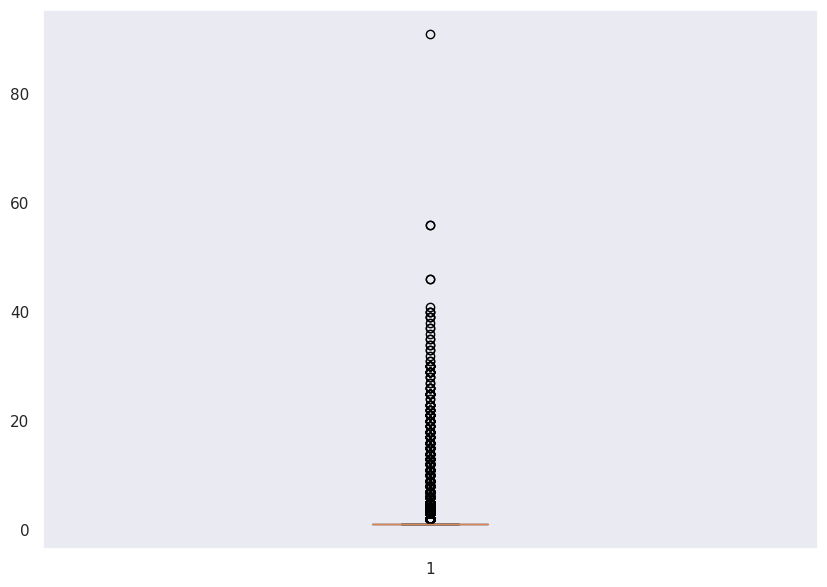

In [556]:
#построим ящик с усами для столбца количество
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['количество'], patch_artist=True)
plt.show()

Видим, что есть большие единичные выбросы

Построим график распределения количества покупок в зависимости от количества машин, ограничим количество машин за 1 покупку

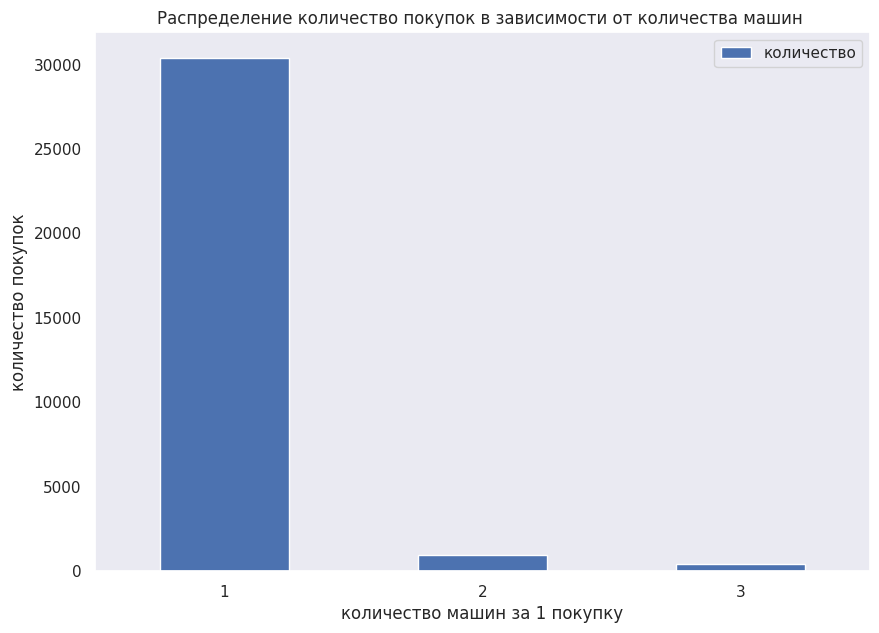

In [557]:
data.loc[data['количество']<4]['количество'].value_counts().to_frame().sort_index().plot.bar(figsize=(10,7))
plt.title('Распределение количество покупок в зависимости от количества машин ')
plt.xlabel('количество машин за 1 покупку')
plt.ylabel('количество покупок')
plt.xticks(rotation=0)
plt.show()

In [558]:
data['количество'].value_counts(normalize=True)[:5]

1    0.925133
2    0.029015
3    0.012940
4    0.007216
5    0.005115
Name: количество, dtype: float64

В 92.5% покупок машин приобреталась 1 машина.

#### Столбец цена

In [559]:
data['цена_usd'].unique()#выведем уникальные значнеия

array([31250.        , 30581.        , 35087.719     , ...,
       63359.97644326, 66115.70247934, 75690.        ])

In [560]:
data['цена_usd'].describe()#описательная статистика

count     32845.000000
mean      29748.086706
std       22366.276354
min        4571.358913
25%       15161.285407
50%       22826.318837
75%       34568.063195
max      498787.514716
Name: цена_usd, dtype: float64

In [561]:
data['цена_usd'] = round(data['цена_usd'])# округлим значение до целого
data['цена_usd'] = data['цена_usd'].astype(int) #изменим тип данных на int(целое)

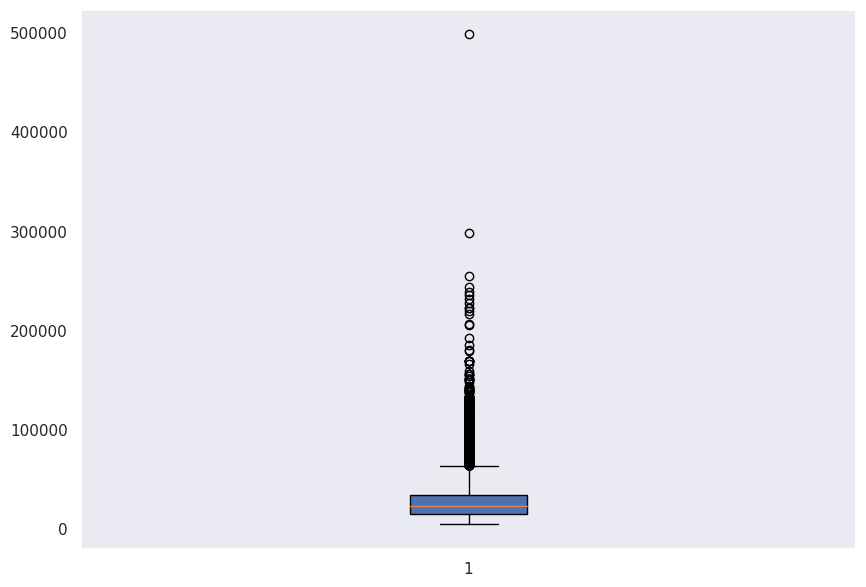

In [562]:
#постороим ящик с усами для столбца цена_usd
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['цена_usd'], patch_artist=True)

plt.show()

<Axes: >

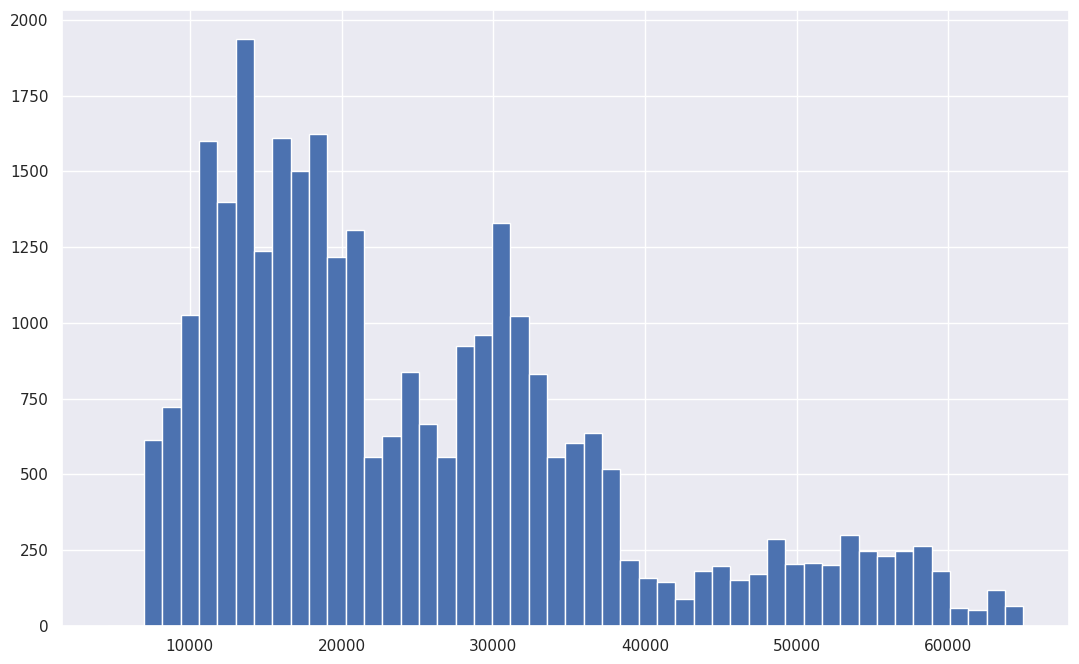

In [563]:
#ограничим значения "размахом усов"
data.loc[(data['цена_usd']<65000)]['цена_usd'].hist(bins=50,figsize=(13, 8))

Наблюдаем 2 пика. Цена, в основном, находится в в пределах от 5000 до 40000.

In [564]:
#проверим соответствие цены и модели
data.loc[(data['цена_usd']>150000)][:5]

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment,transmission_range,drive_range
57,2019,Август,Mercur Auto,Audi,A8,2018,DEU,бензин,3,тipтronic,quattro,Легковые автомобили Premium,Алматы,физ.лицо,1,155706,155705.608999,г.Алматы,Легковые автомобили,F класс,0,3.0,average,AT,4wd
58,2019,Август,Mercur Auto,Audi,A8,2018,DEU,бензин,3,тipтronic,quattro,Легковые автомобили Premium,Алматы,физ.лицо,1,155706,155705.608999,г.Алматы,Легковые автомобили,F класс,0,3.0,average,AT,4wd
59,2019,Август,Mercur Auto,Audi,A8,2018,DEU,бензин,3,тipтronic,quattro,Легковые автомобили Premium,Алматы,физ.лицо,1,155706,155705.608999,г.Алматы,Легковые автомобили,F класс,0,3.0,average,AT,4wd
7145,2019,Февраль,Astana Motors,Hyundai Truck & Bus,Universe,2017,KOR,дизель,12.3,мкпп,2wd,Крупнотоннажные,Атырау,юр.лицо,1,243827,243827.222122,Атырауская область,Коммерческие автомобили,Большие автобусы,0,12.3,huge,MT,2wd
7146,2019,Март,Astana Motors,Hyundai Truck & Bus,Universe,2017,KZ,дизель,12.3,mt,2wd,Крупнотоннажные,Атырау,юр.лицо,1,222640,222639.770983,Атырауская область,Коммерческие автомобили,Большие автобусы,0,12.3,huge,MT,2wd


#### Столбец продажа

In [565]:
data['продажа_usd'].describe()#описательная статистика

count    3.284500e+04
mean     3.530214e+04
std      4.608262e+04
min      4.571359e+03
25%      1.635447e+04
50%      2.553389e+04
75%      3.741071e+04
max      1.980922e+06
Name: продажа_usd, dtype: float64

In [566]:
data['продажа_usd'] = round(data['продажа_usd'])# округлим значение до целого
data['продажа_usd'] = data['продажа_usd'].astype(int) #изменим тип данных на int(целое)

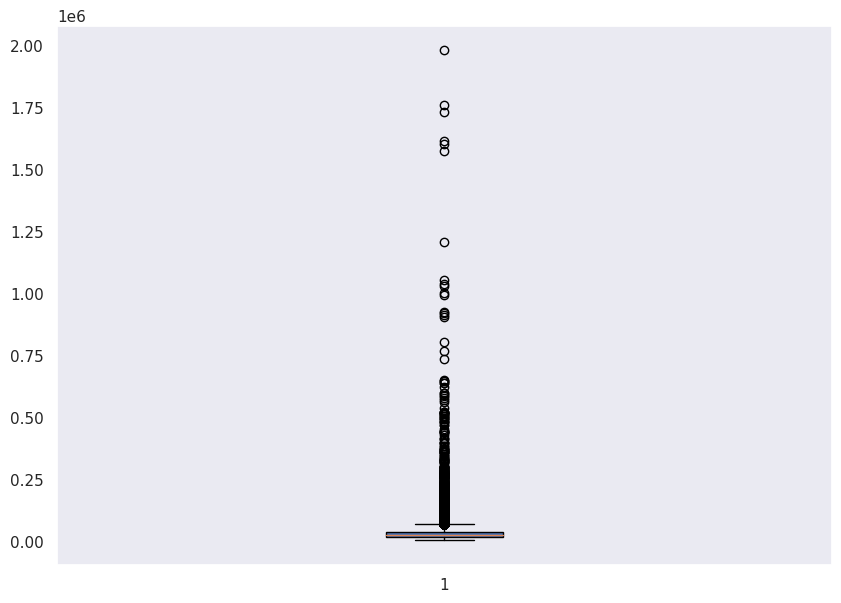

In [567]:
#постороим ящик с усами для столбца продажа_usd
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['продажа_usd'], patch_artist=True)

plt.show()

<Axes: >

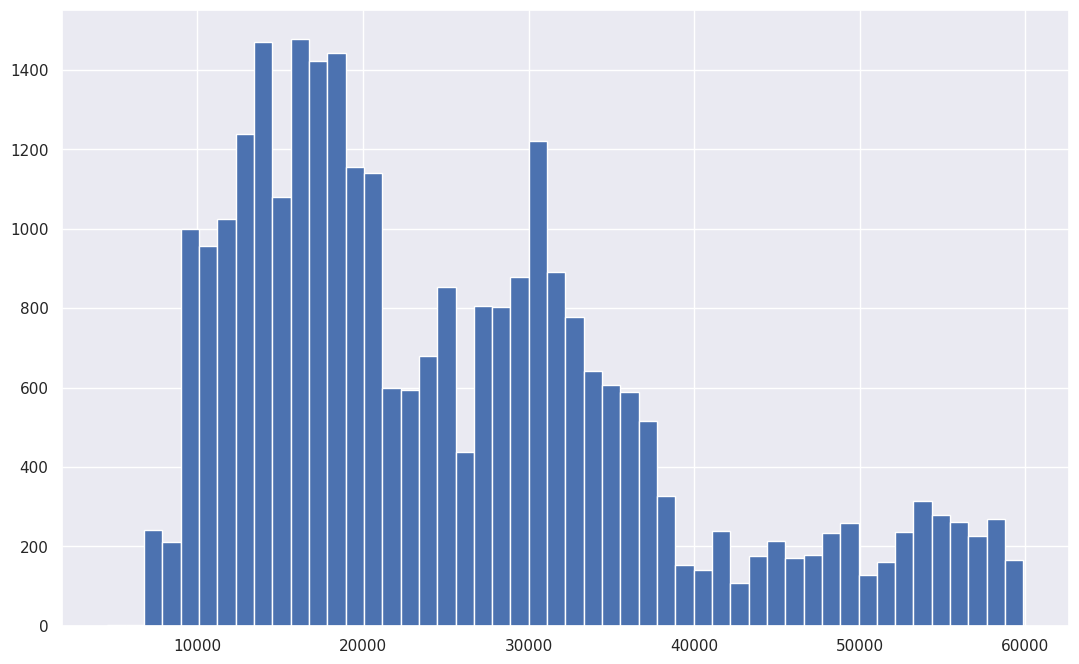

In [568]:
#ограничим значения "размахом усов"
data.loc[(data['продажа_usd']<60000)]['продажа_usd'].hist(bins=50,figsize=(13, 8))

Наблюдаем снижение первого пика и увеличение частоты цен более 40000. Чаще всего по несколько машин покупают, выбирая из более дешевых моделей.

In [569]:
data.loc[(data['продажа_usd']>150000)&(data['количество']>3)].groupby('бренд')['бренд'].count()

бренд
BMW                      28
Daewoo                    8
Foton                     6
Hino                      4
Hyundai Truck & Bus      14
Infiniti                  1
Kia                      46
Lada                    116
Land Rover                1
MAN                       2
Mazda                     9
Mercedes-Benz             2
Mercedes-Benz Trucks      6
Nissan                   19
Scania                    6
Shacman                  10
Skoda                    11
UAZ                       3
Volkswagen               10
МАЗ                       1
Урал                      5
Name: бренд, dtype: int64

In [570]:
data.loc[(data['продажа_usd']>150000)&(data['количество']>5)][:5]#проверим сооответствие продажи и количества

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,сегмент,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment,transmission_range,drive_range
223,2019,Январь,Автоцентр-Бавария,BMW,X5,2017,USA,бензин,3,steptronic,4wd,NaN,Астана,юр.лицо,6,66308,397846,г.Астана,Внедорожники,Стандартные SUV,0,3.0,average,MT,4wd
237,2019,Май,Автоцентр-Бавария,BMW,X5,2017,USA,бензин,3,at,awd,NaN,Астана,юр.лицо,7,67070,469490,г.Астана,Внедорожники,Стандартные SUV,0,3.0,average,AT,4wd
253,2019,Февраль,Автоцентр-Бавария,BMW,X6,2017,USA,бензин,3,steptronic,awd,NaN,Алматы,юр.лицо,8,74621,596970,г.Алматы,Внедорожники,Компактные SUV,0,3.0,average,MT,4wd
256,2019,Март,Автоцентр-Бавария,BMW,X6,2017,USA,бензин,3,steptronic,awd,NaN,Астана,юр.лицо,6,74459,446754,г.Астана,Внедорожники,Компактные SUV,0,3.0,average,MT,4wd
257,2019,Март,Автоцентр-Бавария,BMW,X6,2017,USA,бензин,3,steptronic,awd,NaN,Алматы,юр.лицо,6,74459,446754,г.Алматы,Внедорожники,Компактные SUV,0,3.0,average,MT,4wd


#### Столбец область

In [571]:
data['область'].unique()#выведем уникальные значнеия

array(['г.Алматы', 'Костанайская область', 'Атырауская область',
       'г.Астана', 'Западно-Казахстанская область',
       'Восточно-Казахстанская область', 'Северо-Казахстанская область',
       'Павлодарская область', 'Акмолинская область',
       'Мангистауская область', 'Карагандинская область',
       'Актюбинская область', 'Южно-Казахстанская область',
       'Алматинская область', 'Кызылординская область',
       'Жамбылская область', 'Экспорт область'], dtype=object)

#### Столбец сегментация 2013

In [572]:
data['сегментация_2013']= data['сегментация_2013'].str.strip()#удалим пробелы в конце значения
data['сегментация_2013'].unique()#выведем уникальные значнеия

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

#### Столбец класс 2013

In [573]:
data['класс_2013']= data['класс_2013'].str.strip()#удалим пробелы в конце значения
data['класс_2013'].unique()#выведем уникальные значнеия

array(['C класс', 'D класс', 'Спортивные автомобили', 'E класс',
       'F класс', 'Среднеразмерные SUV', 'Стандартные SUV', 'B класс',
       'Компактные SUV', 'Субкомпактные SUV', 'Большие автобусы',
       'Микроавтобусы', 'Малотоннажные грузовики',
       'Крупнотоннажные грузовики', 'Развозные автомобили',
       'Среднетоннажные грузовики', 'Полноразмерный Минивэн',
       'Средние автобусы', 'Полноразмерные SUV', 'Pick-ups', 'A класс',
       'Компактвэн'], dtype=object)

In [574]:
#удалим ненужные столбцы
data_new = data.drop(columns=['объём_двиг_л', 'коробка_передач','тип_привода', 'сегмент','год'])

Создадим новый столбец с датой ДД-ММ-ГГГГ:

In [575]:
#Создаем словарь
level_map = {'Январь': '31-01-2019',
    'Февраль': '28-02-2019',
    'Март': '31-03-2019',
    'Апрель': '30-04-2019',
    'Май': '31-05-2019',
    'Июнь': '30-06-2019',
    'Июль': '31-07-2019',
    'Август': '31-08-2019',
    'Сентябрь': '30-09-2019',
    'Октябрь': '31-10-2019',
    'Ноябрь': '30-11-2019',
    'Декабрь': '31-12-2019'}

In [576]:
#Создаем словарь
month_map = {'Январь': 1,
    'Февраль': 2,
    'Март': 3,
    'Апрель': 4,
    'Май': 5,
    'Июнь': 6,
    'Июль': 7,
    'Август': 8,
    'Сентябрь': 9,
    'Октябрь': 10,
    'Ноябрь': 11,
    'Декабрь': 12}

In [577]:
data_new['дата'] = data_new['месяц'].map(level_map)#создаем столбец дата

data_new['дата'] = pd.to_datetime(data_new['дата'], format='%d-%m-%Y').dt.date

data_new['month'] = data_new['месяц'].map(month_map)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32845 entries, 0 to 32853
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   месяц                 32845 non-null  object  
 1   компания              32845 non-null  object  
 2   бренд                 32845 non-null  object  
 3   модель                32845 non-null  object  
 4   год_выпуска           32691 non-null  object  
 5   страна_производитель  32845 non-null  object  
 6   вид_топлива           31934 non-null  object  
 7   регион                32845 non-null  object  
 8   тип_клиента           32845 non-null  object  
 9   количество            32845 non-null  int64   
 10  цена_usd              32845 non-null  int64   
 11  продажа_usd           32845 non-null  int64   
 12  область               32845 non-null  object  
 13  сегментация_2013      32845 non-null  object  
 14  класс_2013            32845 non-null  object  
 15  tu

In [578]:
data_new.duplicated().sum()

15966

Получили 15966 явных дубликатов. Т.к. у нас неполная информация по продажам, мы не можем утверждать, что это дубликаты, удалять их не будем.

In [579]:
isna_data(data_new)#посмотрим где остались пропуски

,nan_count,nan_share
v_segment,2019,6.15%
вид_топлива,911,2.77%
год_выпуска,154,0.47%
месяц,0,0.00%
область,0,0.00%
дата,0,0.00%
drive_range,0,0.00%
transmission_range,0,0.00%
v,0,0.00%
turbo,0,0.00%


Вывод:
* проверили названия столбцов датафрейма: привели названия столбцов в соответсвии с PEP 8;
* исследовали соответствие типов данных в столбцах их содержимому: в колонках количество, продажа_usd, цена_usd, объем двигателя, изменили тип данных;
* проверили данные на наличие дубликатов: удалены неявные дубликаты;
* проверили данные на наличие выбросов: выбросы обнаружены в столбцах количество, цена_usd, продажа_usd. Отфильтруем их при необходимости.
* проверили данные на наличие пропусков. В данных имеются пропуски. Заполнили только в столбце тип_клинета. В остальных заполнять их не стали, т.к. мы можем исказить итоговую картину.


## Анализ рынка

### Топовые марки на рынке Казахстана

Выделим из итогового датасета 2 датасета для анализа по признаку "тип клиента"

In [580]:
data_f = data_new.query('тип_клиента == "физ.лицо"').copy()
data_yu = data_new.query('тип_клиента == "юр.лицо"').copy()


Посмотрим матрицы корреляция, для определения связи между данными

In [581]:
corr = data_new.corr()
corr.style.background_gradient(cmap='RdYlGn')

<ipython-input-581-9c597cd4d14b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,количество,цена_usd,продажа_usd,turbo,v,month
количество,1.000000,-0.096494,0.543115,-0.009346,-0.052406,0.007874
цена_usd,-0.096494,1.000000,0.515987,0.001805,0.552601,0.044720
продажа_usd,0.543115,0.515987,1.000000,-0.006079,0.292728,0.022773
turbo,-0.009346,0.001805,-0.006079,1.000000,-0.048878,0.047898
v,-0.052406,0.552601,0.292728,-0.048878,1.000000,0.021519
month,0.007874,0.044720,0.022773,0.047898,0.021519,1.000000


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> в начало работы</div>

interval columns not set, guessing: ['количество', 'цена_usd', 'продажа_usd', 'turbo', 'v', 'month']


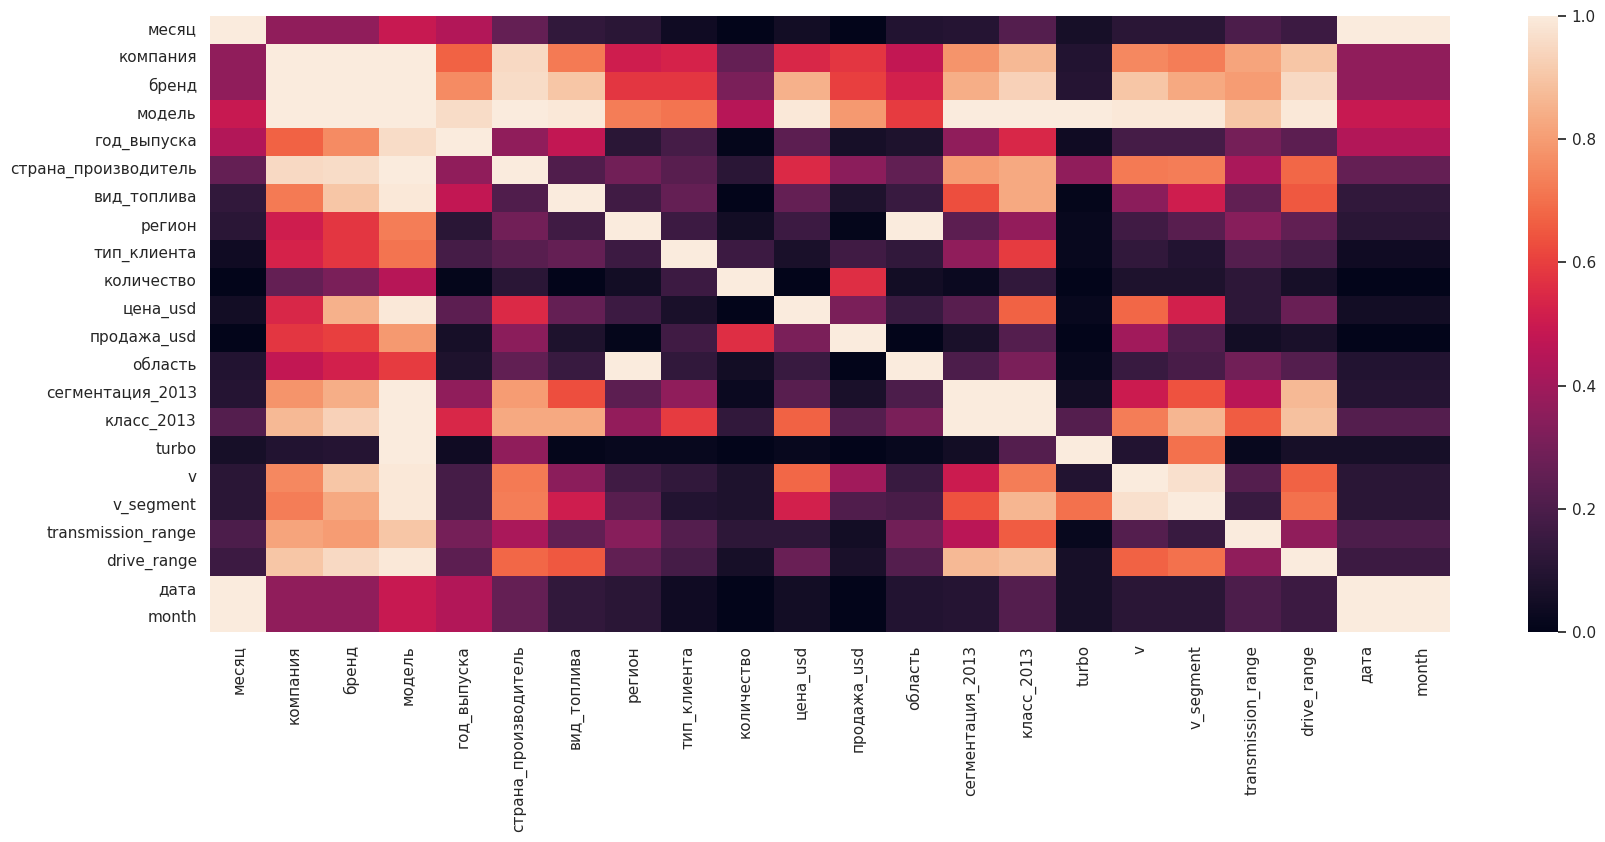

In [582]:
phik_overview = data_new.phik_matrix()
sns.heatmap(phik_overview.round(2))
sns.set(rc = {'figure.figsize':(20,8)})

In [583]:
#Выделим топ-7 брендов по количеству проданных машин
data_brend = data_new.pivot_table(index=['бренд'], values=['количество'], aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)
data_brend['proz'] = round(data_brend['количество']/data_brend['количество'].sum(),4)*100

h=data_brend.head(7)
h

,бренд,количество,proz
19,Lada,9667,21.99
41,Toyota,9374,21.33
10,Hyundai,5703,12.98
8,GAZ,2111,4.80
18,Kia,1815,4.13
32,Ravon,1727,3.93
29,Nissan,1662,3.78


In [584]:
data_brend.tail(7)

,бренд,количество,proz
16,Jaguar,16,0.04
23,MAN,16,0.04
27,Mini,14,0.03
38,SsangYong,14,0.03
45,МАЗ,8,0.02
40,Suzuki,3,0.01
34,Rolls Royce,1,0.00


In [585]:
top_7= h['бренд'].to_list()#добавим названия брендов в список
top_7

['Lada', 'Toyota', 'Hyundai', 'GAZ', 'Kia', 'Ravon', 'Nissan']

In [586]:
#выделим топ-7 брендов, остальные в категорию "другие"
def seg(row):
  try:
    segm = row['бренд']

    if segm in  top_7:
      return segm

    return 'другие'

  except:
    pass

In [587]:
data_brend['top_7'] = data_brend.apply(seg, axis=1)#столбец с категориями
w = data_brend.pivot_table(index='top_7', values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)#группировка по бренду, суммируем количество машин

In [588]:
w

,top_7,количество
7,другие,11894
3,Lada,9667
6,Toyota,9374
1,Hyundai,5703
0,GAZ,2111
2,Kia,1815
5,Ravon,1727
4,Nissan,1662


In [589]:
import plotly.graph_objects as go
fig = go.Figure()
pull = [0]*len(w['количество'])
pull[w['количество'].tolist().index(w['количество'].max())] = 0.1
# Список цветов заливки
colors = ['03045e', '023e8a', '0077b6', '00b4d8', '90e0ef', 'ade8f4', 'caf0f8']
fig.add_trace(go.Pie(values=w['количество'], labels=w['top_7'], pull=pull,
                     marker=dict(colors=colors)))
fig.update_layout(
    title="Топ-7 брендов машин на рынке",
    title_x=0.8,
    margin=dict(l=0, r=0, t=30, b=0),
    legend_orientation="h",
)
fig.show()

Лидеры по количеству проданных машин

Lada-9667 машин, 22% от всего количества.

Toyota	9374 - 21.3%

Hyundai 5703- 13%

Меньше всего продано машин брендов Rolls Royce-1 машина, Suzuki-3 машины, МАЗ-8 машин.

In [590]:
#группировка по году выпуска, суммируем количество машин для каждого года. Учитываем марки, входящие в top_7
data_new.query('бренд in @top_7').pivot_table(index=['год_выпуска'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)

,год_выпуска,количество
4,2018,25559
3,2017,6376
2,2016,104
1,2015,18
0,2014,2


In [591]:
#группировка по стране производителя, суммируем количество машин. Учитываем марки, входящие в top_7
data_new.query('бренд in @top_7').pivot_table(index=['страна_производитель'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)

,страна_производитель,количество
2,KZ,17251
3,RUS,8437
0,JPN,3210
5,TUR,1209
7,UZB,1175
4,THA,716
6,UK,51
1,KOR,10


In [592]:
#группировка по бренду, суммируем количество машин. Учитываем марки, входящие в top_7 и страну производителя Казахстан
data_new.query('бренд in @top_7').loc[data_new['страна_производитель']=='KZ'].pivot_table(index=['бренд'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)

,бренд,количество
3,Lada,9424
1,Hyundai,5494
2,Kia,1661
4,Ravon,552
0,GAZ,120


In [593]:
#группировка по бренду и стране производителю, суммируем количество машин. Учитываем марки, входящие в top_7
data_new.query('бренд in @top_7').pivot_table(index=['бренд', 'страна_производитель'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='бренд', ascending=False)

,бренд,страна_производитель,количество
17,Toyota,TUR,1209
16,Toyota,THA,716
15,Toyota,RUS,4240
14,Toyota,JPN,3209
13,Ravon,UZB,1175
12,Ravon,KZ,552
10,Nissan,RUS,1611
11,Nissan,UK,51
9,Lada,RUS,243
8,Lada,KZ,9424


In [594]:
#Найдем доли количества произведенных машин по странам в %. Учитываем марки, входящие в top_7
st_top = data_new.query('бренд in @top_7').pivot_table(index=[ 'страна_производитель'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)
st_top['%'] = round(st_top['количество']/st_top['количество'].sum(),3)*100
st_top

,страна_производитель,количество,%
2,KZ,17251,53.8
3,RUS,8437,26.3
0,JPN,3210,10.0
5,TUR,1209,3.8
7,UZB,1175,3.7
4,THA,716,2.2
6,UK,51,0.2
1,KOR,10,0.0


В основном купленные авто, из топ-7(количество проданных машин) брендов, были новыми (2018 г.в.).  Основные страны-производители: Казахстан, Россия и Япония.


In [595]:
#Найдем доли количества произведенных машин по странам в %.
st = data_new.pivot_table(index=[ 'страна_производитель'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)
st['%'] = round(st['количество']/st['количество'].sum(),3)*100
st

,страна_производитель,количество,%
6,KZ,20708,47.1
8,RUS,13671,31.1
4,JPN,5024,11.4
11,TUR,1214,2.8
14,UZB,1178,2.7
10,THA,953,2.2
2,DEU,437,1.0
13,USA,374,0.9
12,UK,259,0.6
7,NLD,72,0.2


В целом по рынку, лидеры страны-производители те же.

In [596]:
#построим таблицу-рейтинг брендов по сумме продаж
data_sale = data_new.pivot_table(index=['бренд'], values=['продажа_usd'], aggfunc={'продажа_usd':'sum'}).\
reset_index().sort_values(by='продажа_usd', ascending=False)#.head(7)#.style.background_gradient(cmap=cm)
data_sale['%'] = round(data_sale['продажа_usd']/data_sale['продажа_usd'].sum(),4)*100
data_sale['продажа_usd'] = round(data_sale['продажа_usd']/1000000,2)
data_sale = data_sale.rename({'продажа_usd': 'продажа, млн$'}, axis=1)
data_sale.head(10)



,бренд,"продажа, млн$",%
41,Toyota,383.88,33.11
10,Hyundai,124.85,10.77
19,Lada,94.26,8.13
21,Lexus,84.76,7.31
17,KAMAZ,48.67,4.20
8,GAZ,40.42,3.49
29,Nissan,37.22,3.21
18,Kia,36.75,3.17
2,BMW,23.36,2.01
43,Volkswagen,20.54,1.77


In [597]:
fig = px.bar(data_sale.head(10), x = 'бренд', y = 'продажа, млн$',  \
            color_discrete_sequence=['#00b4d8','#4C6793'],\
             text='продажа, млн$',height=600, width=1000
             )
fig.update_layout(title =f'Топ - 10 брендов по сумме продаж', xaxis_title= 'бренды',\
                  yaxis_title= 'продажа, млн$',\
                  xaxis={'categoryorder':'total descending'}
                  )
fig.show()

In [598]:
data_sale.tail(10)

,бренд,"продажа, млн$",%
23,MAN,2.12,0.18
3,Cadillac,1.99,0.17
30,Peugeot,1.89,0.16
44,Volvo,1.49,0.13
16,Jaguar,0.97,0.08
34,Rolls Royce,0.50,0.04
45,МАЗ,0.43,0.04
27,Mini,0.42,0.04
38,SsangYong,0.24,0.02
40,Suzuki,0.07,0.01


Лидеры-бренды по сумме продаж:

Toyota	383.88 млн$-33.11% от общей суммы

Hyundai	124.85млн$-10.77%

Lada	94.26млн$-8.13%

Наименьшая сумма продаж у брендов:

Mini	0.42 млн$-	0.04%

SsangYong	0.24 млн$-	0.02%

Suzuki	0.07 млн$-	0.01%


Найдем самые популярные модели машин на рынке:

In [599]:
#по сумме продаж
data_sale_model = data_new.pivot_table(index=['модель'], values=['продажа_usd'], aggfunc={'продажа_usd':'sum'}).\
reset_index().sort_values(by='продажа_usd', ascending=False)#.head(7)#.style.background_gradient(cmap=cm)
data_sale_model['%'] = round(data_sale_model['продажа_usd']/data_sale_model['продажа_usd'].sum(),4)*100
data_sale_model['продажа_usd'] = round(data_sale_model['продажа_usd']/1000000,2)
data_sale_model = data_sale_model.rename({'продажа_usd': 'продажа, млн$'}, axis=1)
data_sale_model.head(10)

,модель,"продажа, млн$",%
90,Camry,115.88,9.99
159,LC Prado,83.59,7.21
160,LC200,73.60,6.35
261,Tucson,50.18,4.33
162,LX,46.42,4.00
218,RAV4,42.22,3.64
148,HILUX DC,24.93,2.15
101,Creta,24.84,2.14
115,Elantra,22.71,1.96
97,Corolla,22.70,1.96


Модели машин, с наибольшей суммой продаж:

Camry	115.88 млн$ - 9.99% от общей суммы,

LC Prado 83.59 млн$ - 7.21%,

Land Cruiser 200 73.60 млн$ -	6.35%.

In [600]:
#по количеству проданных машин
data_model = data_new.pivot_table(index=['модель'], values=['количество'], aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)#.head(7)#.style.background_gradient(cmap=cm)
data_model['proz'] = round(data_model['количество']/data_model['количество'].sum(),4)*100
data_model.head(10)

,модель,количество,proz
90,Camry,3440,7.83
136,Granta,2771,6.30
34,4x4,2329,5.30
261,Tucson,1890,4.30
265,Vesta,1843,4.19
163,Largus,1616,3.68
159,LC Prado,1489,3.39
218,RAV4,1348,3.07
72,Accent,1332,3.03
101,Creta,1202,2.73


Модели машин, с наибольшим количество проданных машин:

Camry	3440 машин-7.83% от общего числа

Granta	2771машин-6.30%

Lada 4x4	2329машин-5.30%

In [601]:
data_new.loc[data_new['модель']=='4x4'][:2]

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment,transmission_range,drive_range,дата,month
11937,Январь,БИПЭК АВТО,Lada,4x4,2018,KZ,бензин,Экибастуз,юр.лицо,3,9000,27000,Павлодарская область,Внедорожники,Субкомпактные SUV,0,1.69,small,MT,4wd,2019-01-31,1
11938,Январь,БИПЭК АВТО,Lada,4x4,2018,KZ,бензин,Шымкент,физ.лицо,1,9000,9000,Южно-Казахстанская область,Внедорожники,Субкомпактные SUV,0,1.69,small,MT,4wd,2019-01-31,1


Посмотрим в разрезе типов клиентов

Найдем количество машин, по брендам, купленных юр.лицами:

In [602]:
data_brend_ur = data_new.query('тип_клиента=="юр.лицо"').pivot_table(index=['бренд'], values=['количество'], aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)
data_brend_ur['%'] = round(data_brend_ur['количество']/data_brend_ur['количество'].sum(),3)*100
data_brend_ur = data_brend_ur.head(7)
data_brend_ur

,бренд,количество,%
19,Lada,8089,42.2
36,Toyota,2154,11.2
18,Kia,1218,6.4
8,GAZ,1128,5.9
17,KAMAZ,888,4.6
37,UAZ,882,4.6
10,Hyundai,730,3.8


Найдем количество машин, по брендам, купленных физ.лицами:

In [603]:
#выделим данные по физ.лицам
data_brend_fz = data_new.query('тип_клиента=="физ.лицо"').pivot_table(index=['бренд'], values=['количество'], aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False).head(7)
data_brend_fz['%'] = round(data_brend_fz['количество']/data_brend_fz['количество'].sum(),3)*100 # = data_brend.head(7)
data_brend_fz = data_brend_fz.head(7)
data_brend_fz

,бренд,количество,%
33,Toyota,7220,38.9
8,Hyundai,4973,26.8
26,Ravon,1599,8.6
15,Lada,1578,8.5
27,Renault,1252,6.7
6,GAZ,983,5.3
23,Nissan,952,5.1


In [604]:

# Создание сабплота с двумя графиками
fig = make_subplots(rows=1, cols=2, subplot_titles=("Топ-7 брендов машин на рынке по количеству проданных для юр.лиц", "Топ-7 брендов машин на рынке по количеству проданных для физ.лиц"))
fig.add_trace(
    go.Bar(x=data_brend_ur['бренд'], y=data_brend_ur['количество'], text=data_brend_ur['количество'], textposition='auto',
           marker=dict(color='#023e8a')),  # Изменение цвета заливки на steelblue
    row=1, col=1)
fig.add_trace(
    go.Bar(x=data_brend_fz['бренд'], y=data_brend_fz['количество'], text=data_brend_fz['количество'], textposition='auto',
           marker=dict(color='#00b4d8')),  # Изменение цвета заливки на orange
    row=1, col=2)
# Настройка макета
fig.update_layout(height=600, width=1300, showlegend=False)
fig.show()

Lada 42.2%, Toyota 11.2%, Kia 6.4% - бренды лидеры по количеству проданных машин у юр.лиц

Toyota 38.9%, Hyundai	26.8%, Ravon 8.6% - бренды лидеры по количеству проданных машин у физ.лиц




In [605]:
data_new.pivot_table(index=['тип_клиента'], values=['количество'], aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False).head(7)

,тип_клиента,количество
0,физ.лицо,24783
1,юр.лицо,19170


In [606]:
data_new.pivot_table(index=['тип_клиента'], values=['продажа_usd'], aggfunc={'продажа_usd':'sum'}).\
reset_index().sort_values(by='продажа_usd', ascending=False).head(7)

,тип_клиента,продажа_usd
0,физ.лицо,716777857
1,юр.лицо,442720906


56% от количества проданных машин приходится на физ.лиц и 62 % от общей суммы продаж. Физ.лица выбирают более дорогие модели машин. У юр.лиц на первом месте бренд Lada.
(машины бренда Lada почти в 3 раза дешевле машин бренда Toyota)

In [607]:
data_new.loc[(data_new['бренд']=='Lada')|(data_new['бренд']=='Toyota')].\
pivot_table(index=['бренд'], values=['цена_usd'], aggfunc={'цена_usd':'median'}).reset_index()

,бренд,цена_usd
0,Lada,11300
1,Toyota,34163


### Динамика продаж помесячно

#### В денежном и натуральном выражении

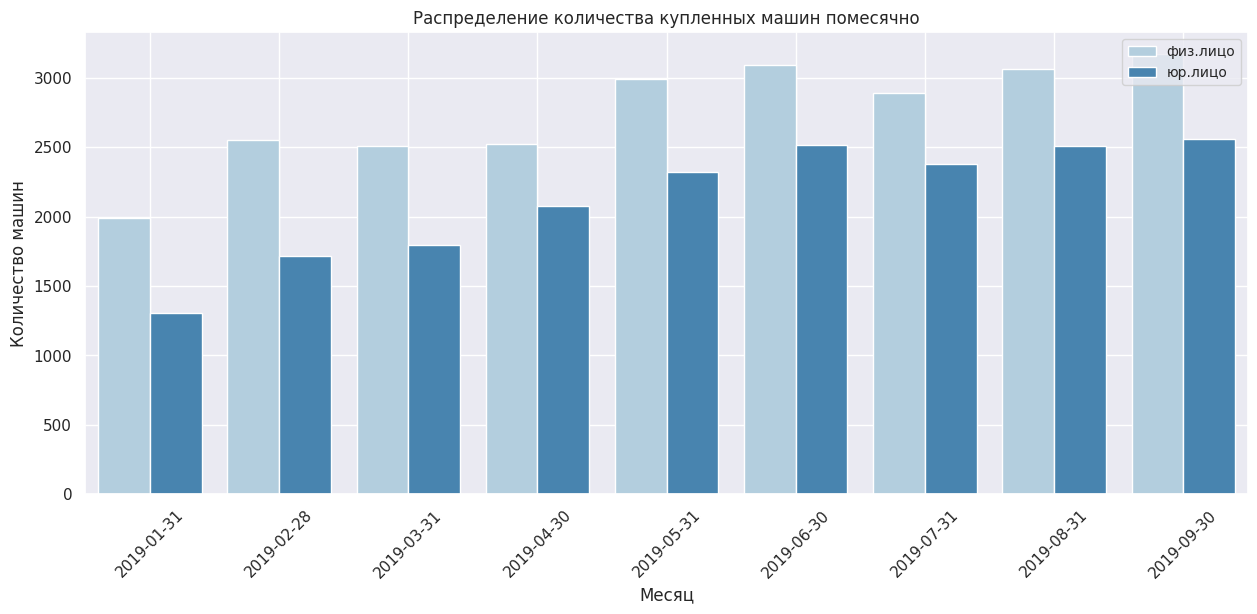

In [608]:
sns.color_palette("Blues", as_cmap=True)
data_cc = data_new.groupby(['дата', 'тип_клиента'], as_index=False)[['количество']].sum()

sns.set_style('dark')
plt.figure(figsize=(15, 6))
# Добавляем параметр 'palette' для настройки цветовой гаммы графика
sns.barplot(x='дата', y='количество', data=data_cc, hue='тип_клиента', palette='Blues' )
plt.title('Распределение количества купленных машин помесячно')
plt.xlabel('Месяц')
plt.ylabel('Количество машин')
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=10)
plt.grid()
plt.show()

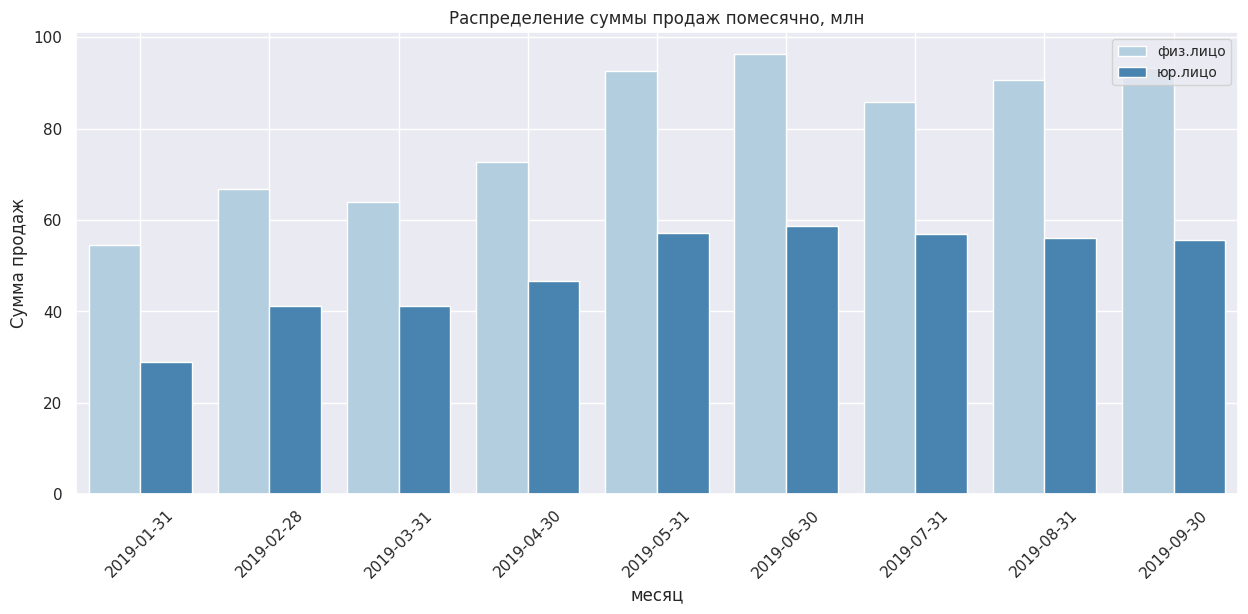

In [609]:
sns.color_palette("Blues", as_cmap=True)
data_cc2 = data_new.groupby(['дата', 'тип_клиента'], as_index=False)[['продажа_usd']].sum().sort_values(by='дата')
data_cc2['продажа_usd'] = round(data_cc2['продажа_usd']/1000000,2)
data_cc2 = data_cc2.rename({'продажа_usd': 'продажа, млн'}, axis=1)
sns.set_style('dark')
plt.figure(figsize=(15, 6))
# Добавляем параметр 'palette' для настройки цветовой гаммы графика
sns.barplot(x='дата', y='продажа, млн', data=data_cc2.sort_values(by='дата'), hue='тип_клиента', palette='Blues' )
plt.title('Распределение суммы продаж помесячно, млн')
plt.xlabel('месяц')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=10)
plt.grid()
plt.show()

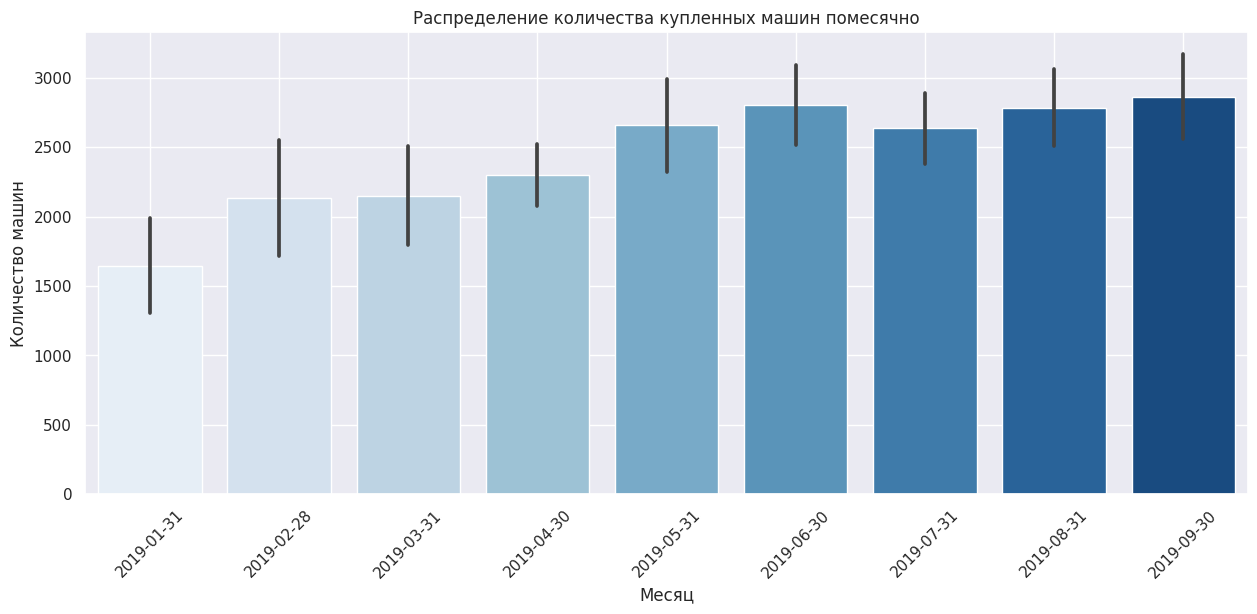

In [610]:
data_cc = data_new.groupby(['дата', 'тип_клиента'], as_index=False)[['количество']].sum()
sns.set_style('dark')
plt.figure(figsize=(15, 6))

sns.barplot(x='дата', y='количество', data=data_cc, palette='Blues')
plt.title('Распределение количества купленных машин помесячно')
plt.xlabel('Месяц')
plt.ylabel('Количество машин')
plt.xticks(rotation=45)

plt.grid()
plt.show()

В целом наблюдается положительная динамика по количеству проданных машин и сумме продаж и юр.лиц и у физ.лиц с начала года, с лета рост спроса замедляется у физ.лиц, снижается у юр.лиц. Наблюдаются и сезонные спады спроса.

#### Динамика продаж по категориям

Напишем функцию построения графиков sns_barplot:

In [611]:
def sns_barplot(data1, data2, x, y, hue, tit1, tit2, xlab, ylab):
    plt.figure(figsize=(23, 10))

    # Объединим данные для обоих графиков
    combined_data = pd.concat([data1, data2])

    # Создадим пользовательскую палитру цветов на основе уникальных значений в столбце hue
    unique_hue_values = combined_data[hue].unique()
    n_unique_hue_values = len(unique_hue_values)
    color_palette = sns.color_palette("husl", n_unique_hue_values)
    hue_colors = {value: color_palette[i] for i, value in enumerate(unique_hue_values)}

    # Группируем и сортируем данные для первого графика
    data_ed1 = data1.groupby([x, hue], as_index=False)[y].sum().sort_values(by=x, ascending=True)
    ax1 = plt.subplot(1, 2, 1)

    # Строим столбчатый график средствами seaborn с пользовательской палитрой цветов
    sns.barplot(x=x, y=y, data=data_ed1, hue=hue, ax=ax1, palette=hue_colors)
    plt.title(tit1)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xticks(rotation=40)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(which='major')
    plt.grid(which='minor', linestyle=':')

    # Группируем и сортируем данные для второго графика
    data_ed2 = data2.groupby([x, hue], as_index=False)[y].sum().sort_values(by=x, ascending=True)
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)

    # Строим столбчатый график средствами seaborn с пользовательской палитрой цветов
    sns.barplot(x=x, y=y, data=data_ed2, hue=hue, ax=ax2, palette=hue_colors)
    plt.title(tit2)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xticks(rotation=40)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid()

    # Отображаем графики на экране
    plt.show()


In [612]:
list_auto = ['вид_топлива', 'v_segment','сегментация_2013', 'год_выпуска']#сохраним категории, по каторым нужна динамика продаж

С помощью цикла построим графики по всем категориям

In [613]:
for i in list_auto:
# Группировка данных по дате и виду топлива с суммированием количества
  df_grouped = data_f.groupby(['month', i], as_index=False)['количество'].sum()

# Создание разных серий данных для каждого вида топлива
  df_pivot = df_grouped.pivot(index='month', columns=[i], values='количество')
  colors = ['#03045e', '#F72585', '#7209B7', '#00b4d8', '#affc41', '#2d6a4f','#0b132b']#['blue', 'green', 'red', 'orange']  # Замените на нужные цвета

# Построение интерактивного графика
  #fig = px.line(df_pivot, x=df_pivot.index, y=df_pivot.columns, template='plotly_white', color_discrete_map=dict(zip(df_pivot.columns, colors)))
# Построение интерактивного графика
  fig = px.line(df_pivot, x=df_pivot.index, y=df_pivot.columns, template='plotly_white', color_discrete_map=dict(zip(df_pivot.columns, colors)))

# Настройка отображения
  fig.update_layout(
    title=f'Распределение количества машин по {i}',
    xaxis_title='month',
    yaxis_title='Количество',
    legend_title=i
  )

# Отображение графика
  fig.show()

Наблюдается рост спроса на внедорожники в течение года, особенно к осени, в следствии чего увеличиваются продажи машин с двигателем "среднего" объема в августе(в сентябре спрос падает, не смотря на снижение средней цены на ключевые модели), в сентябре преобладают внедорожники с маленьким объемом(за счет моделей Creta и lada 4х4). К осени снижаются продажи легковых автомобилей.
В июле наблюдаем сезонное снижение общего спроса на автомобили.
По году выпуска можно сказать, что стремительное падение количества машин 2017 г.в. связано с сокращением их количества в целом, возможно в начале года дилеры распродавали их с дополнительными бонусами, чтобы освободить метсо для завоза машин 2018 г.в.


По остальным характеристикам, в целом, изменения незначительные за данный период.

Ниже рассмотрели продажи внедороников в августе-сентябре по количеству и средней цене, объем двигателя - маленький и средний.

In [614]:
#сгруппируем по месяцу, модели и объему двигателя, найдем количество проданных машин
data_new.query('(v_segment == "small"|v_segment == "average")  and (month == 9|month == 8) and сегментация_2013 =="Внедорожники"').\
groupby(['month','модель','v_segment'])['количество'].agg(['sum']).\
reset_index().sort_values(by= ['sum','month'], ascending=False)[:20]

,month,модель,v_segment,sum
321,9,4x4,small,350
252,8,Tucson,average,320
567,9,Tucson,average,286
177,8,RAV4,average,272
346,9,Creta,small,244
6,8,4x4,small,227
492,9,RAV4,average,195
407,9,LC Prado,average,162
31,8,Creta,small,158
92,8,LC Prado,average,138


In [615]:
list_j2 = ['4x4', 'Tucson', 'RAV4', 'Creta', 'LC Prado']#сохраним в список модели, которые продавались больше

In [616]:
#посмотрим на медианную цену популярных моделей в августе и сентябре
data_new.query('модель in@list_j2 and (v_segment == "small" or v_segment == "average")\
              and (month == 9|month == 8) and сегментация_2013 =="Внедорожники"').\
          groupby(['month','модель','v_segment'])['цена_usd'].agg(['median']).\
          reset_index().sort_values(by= ['модель','month'], ascending=False)

,month,модель,v_segment,median
45,9,Tucson,extra_small,NaN
46,9,Tucson,small,31872.0
47,9,Tucson,average,24784.0
48,9,Tucson,above_average,NaN
49,9,Tucson,huge,NaN
20,8,Tucson,extra_small,NaN
21,8,Tucson,small,31902.0
22,8,Tucson,average,24620.0
23,8,Tucson,above_average,NaN
24,8,Tucson,huge,NaN


В сентябре цена была в основном ниже(объем двигателя "средний"), но тем не менее спрос упал.

Посмотрим на динамику продаж в разрезе тип_клиента

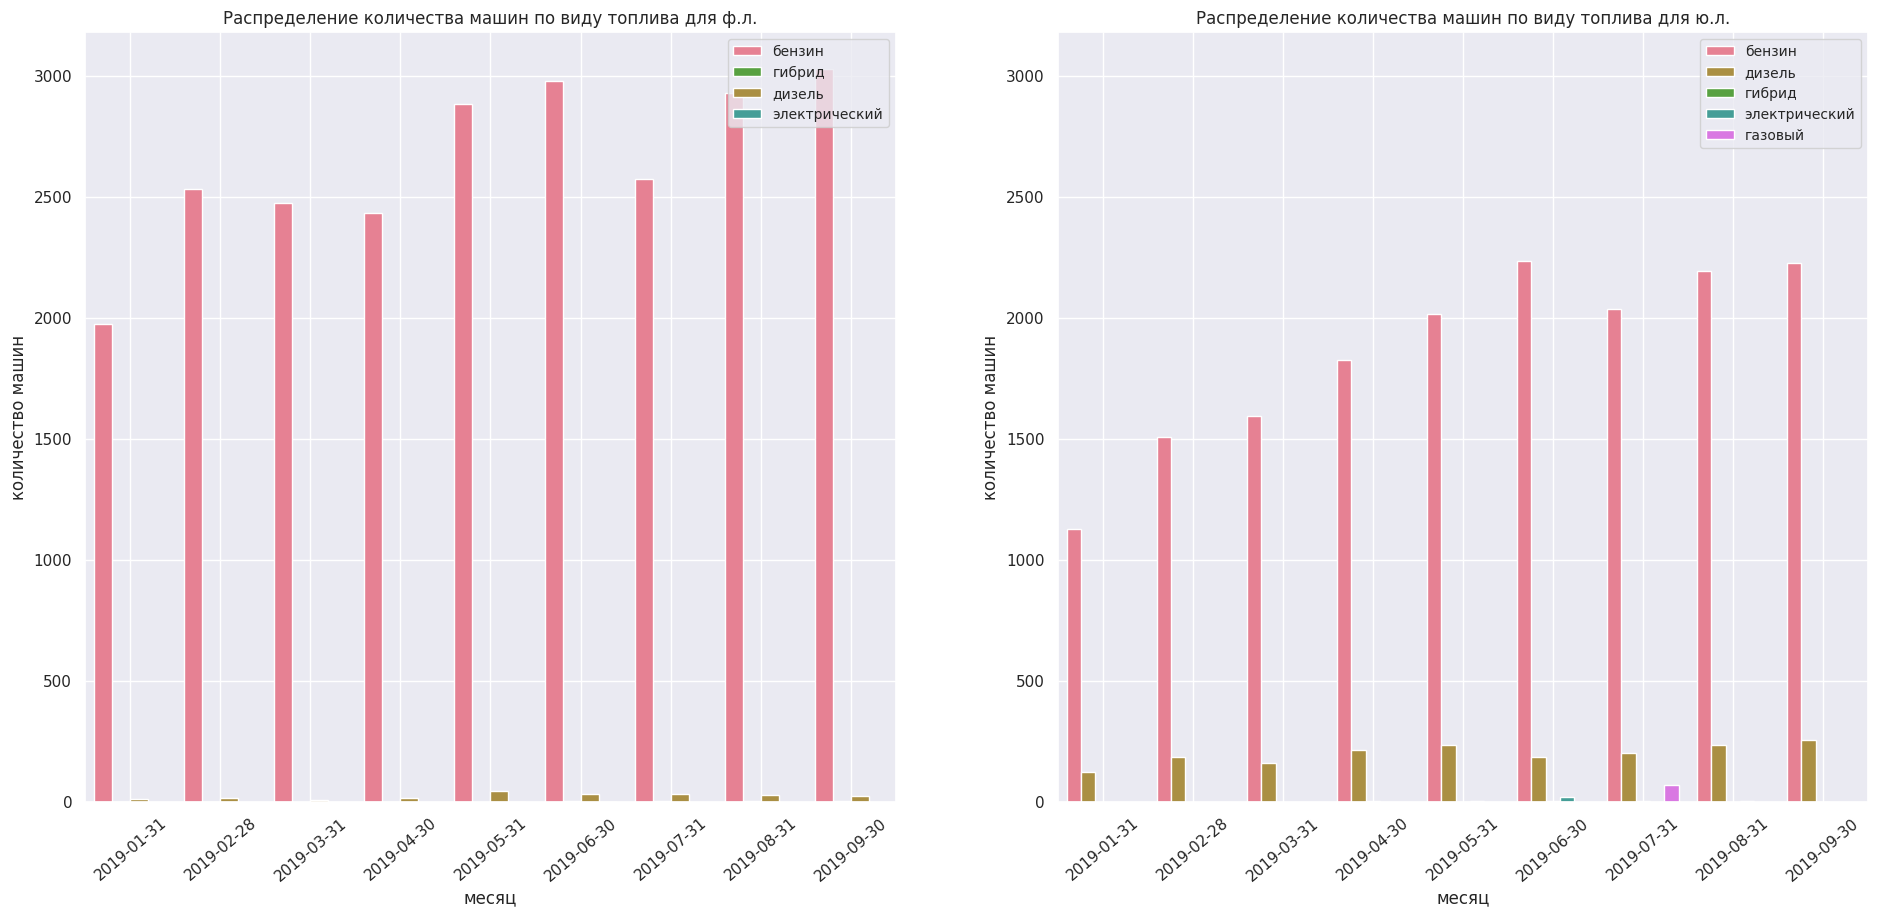

In [617]:
sns_barplot(data_f, data_yu, 'дата', 'количество', 'вид_топлива', \
            'Распределение количества машин по виду топлива для ф.л.', 'Распределение количества машин по виду топлива для ю.л.',\
            'месяц', 'количество машин')

Количество купленных машин на бензине физ.лицами в течении года колеблется, но в целом растет. Для юр.лиц рост более равномерный.

In [618]:
#Посмотрим на динамику без учета вид_топлива-беззин
data_f_without_B = data_f.query('вид_топлива!="бензин"').copy()
data_yu_without_B = data_yu.query('вид_топлива!="бензин"').copy()

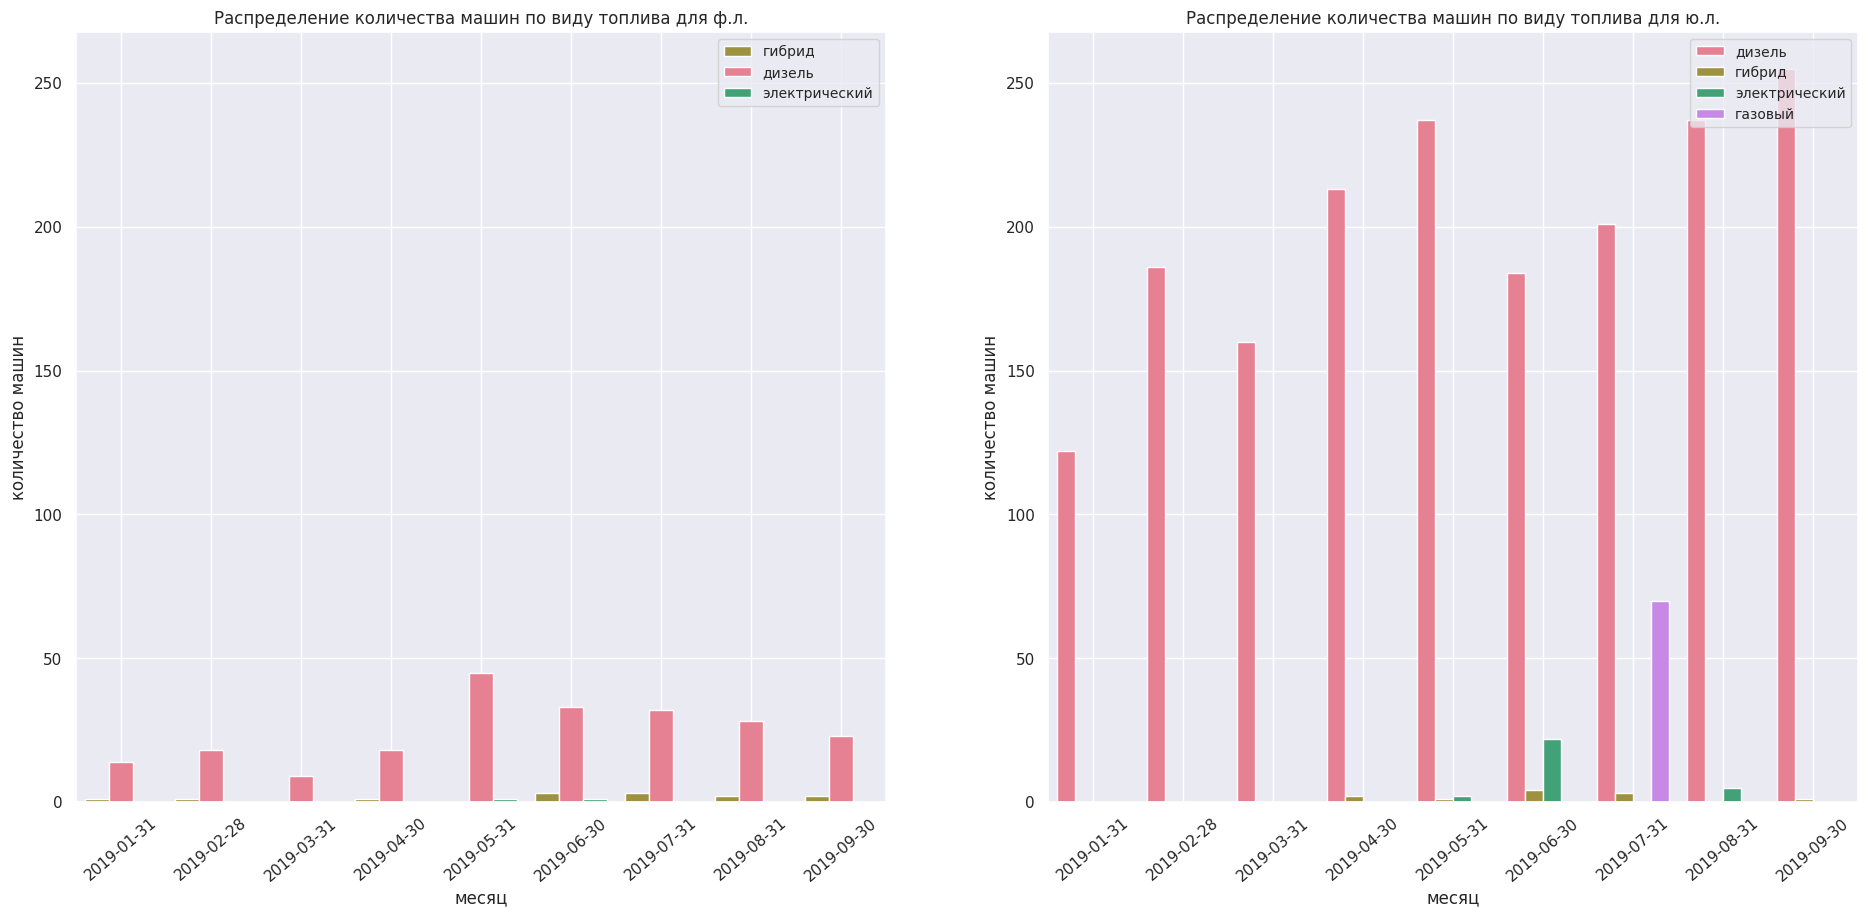

In [619]:
sns_barplot(data_f_without_B, data_yu_without_B, 'дата', 'количество', 'вид_топлива', \
            'Распределение количества машин по виду топлива для ф.л.', 'Распределение количества машин по виду топлива для ю.л.',\
            'месяц', 'количество машин')

Спрос на машина на дизеле в целом выше во второй половине года.

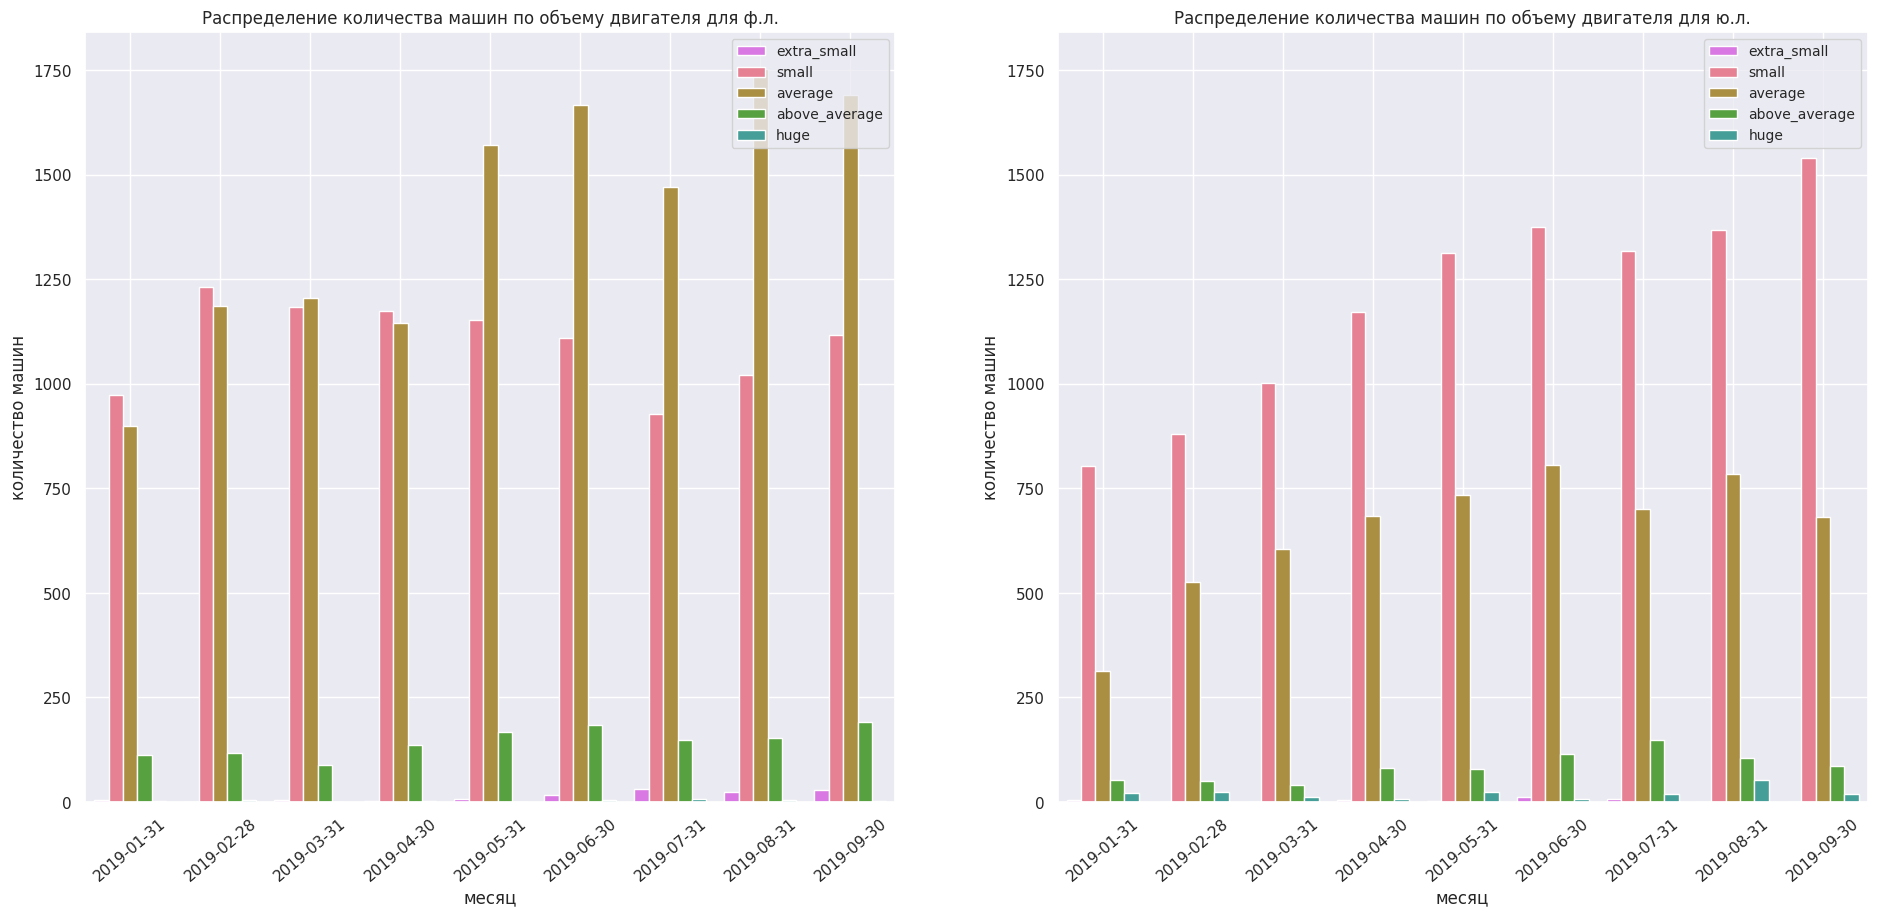

In [620]:
sns_barplot(data_f, data_yu, 'дата', 'количество', 'v_segment', \
            'Распределение количества машин по объему двигателя для ф.л.', 'Распределение количества машин по объему двигателя для ю.л.',\
            'месяц', 'количество машин')

Для физ.лиц:
Спрос на машины с объемом двигателей "средний" с мая заметно возрастает, а спрос на машины с од "маленький" проседает летом.Так же появляется небольшой спрос на машины с объемом двигателя "очень маленький" в летние месяца.

У юр.лиц в целом идет рост спроса машин по всем од, спад наблюдается по всем летом, кроме машин с од "выше среднего" и "очень большой". Возможно связо с обновлениями автопарка к лету, к туристическому сезону.

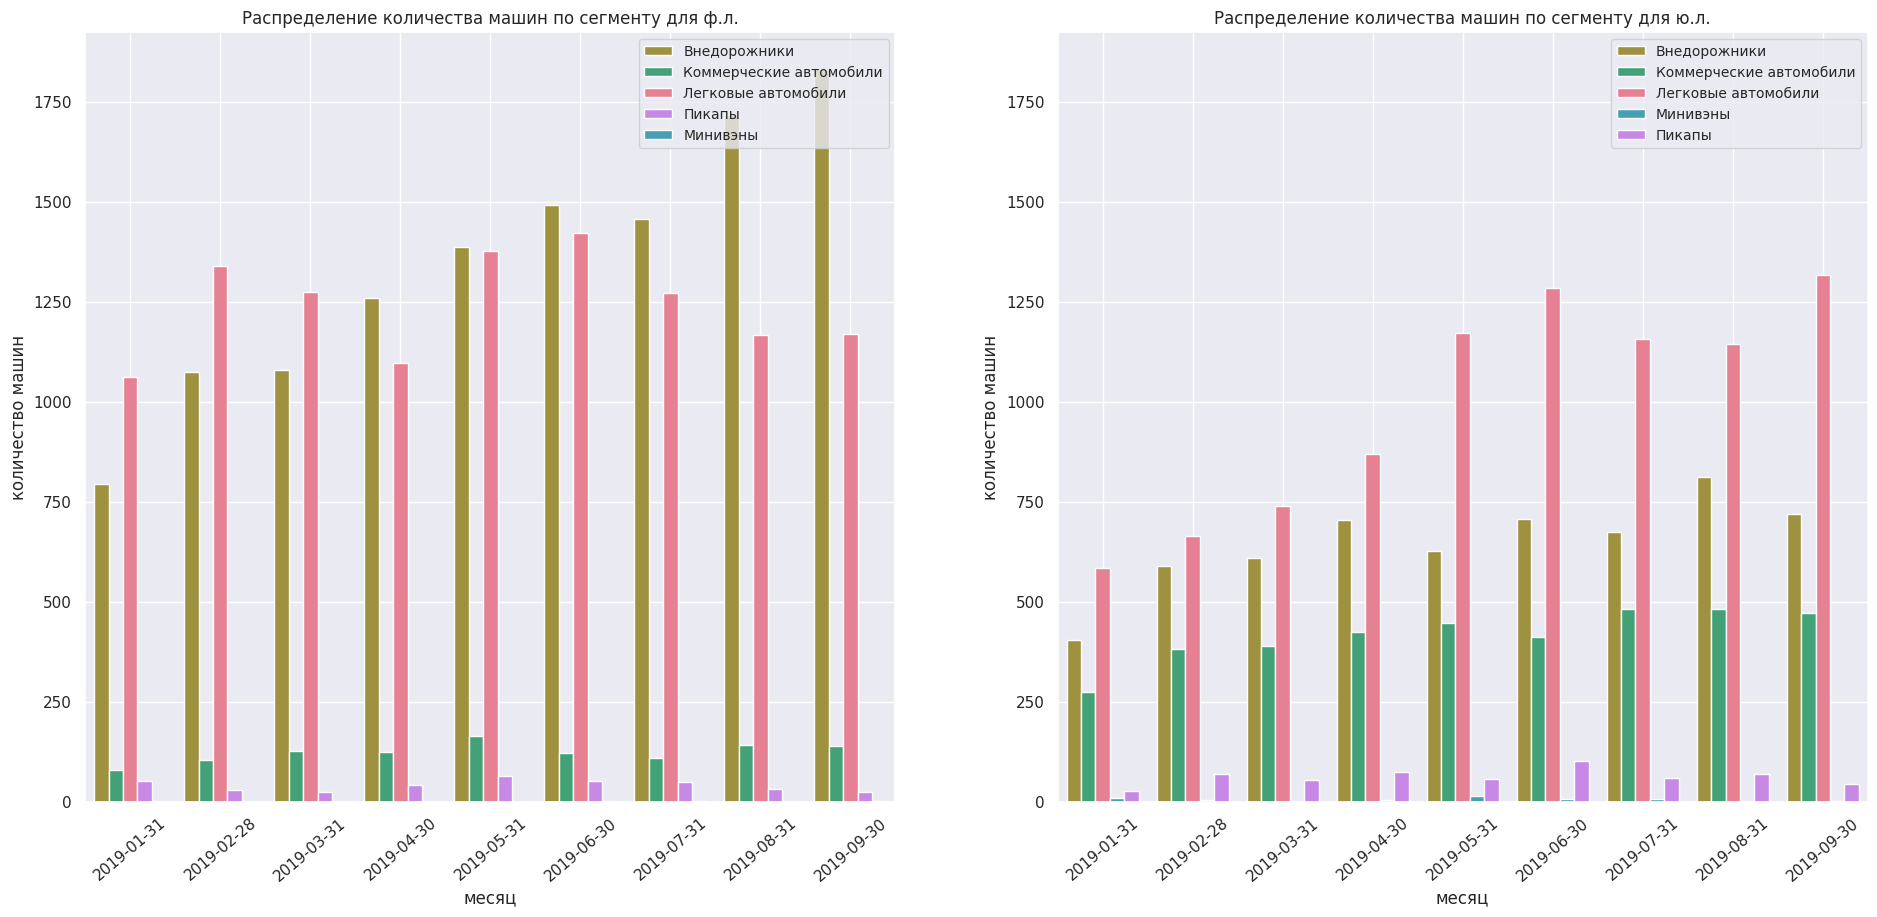

In [621]:
sns_barplot(data_f, data_yu, 'дата', 'количество', 'сегментация_2013', \
            'Распределение количества машин по сегменту для ф.л.', 'Распределение количества машин по сегменту для ю.л.',\
            'месяц', 'количество машин')

Здесь можно отметить, то, что спрос на внедорожники у физ.лиц растет с приближением осени.

У юр.лиц же, растет спрос на легковые и чаще всего это машины с "маленьким" объемом двигателя. Снизился спрос на внедорожники, что мы видели выше (это дало в сентябре замедление роста спроса  в целом на рынка).

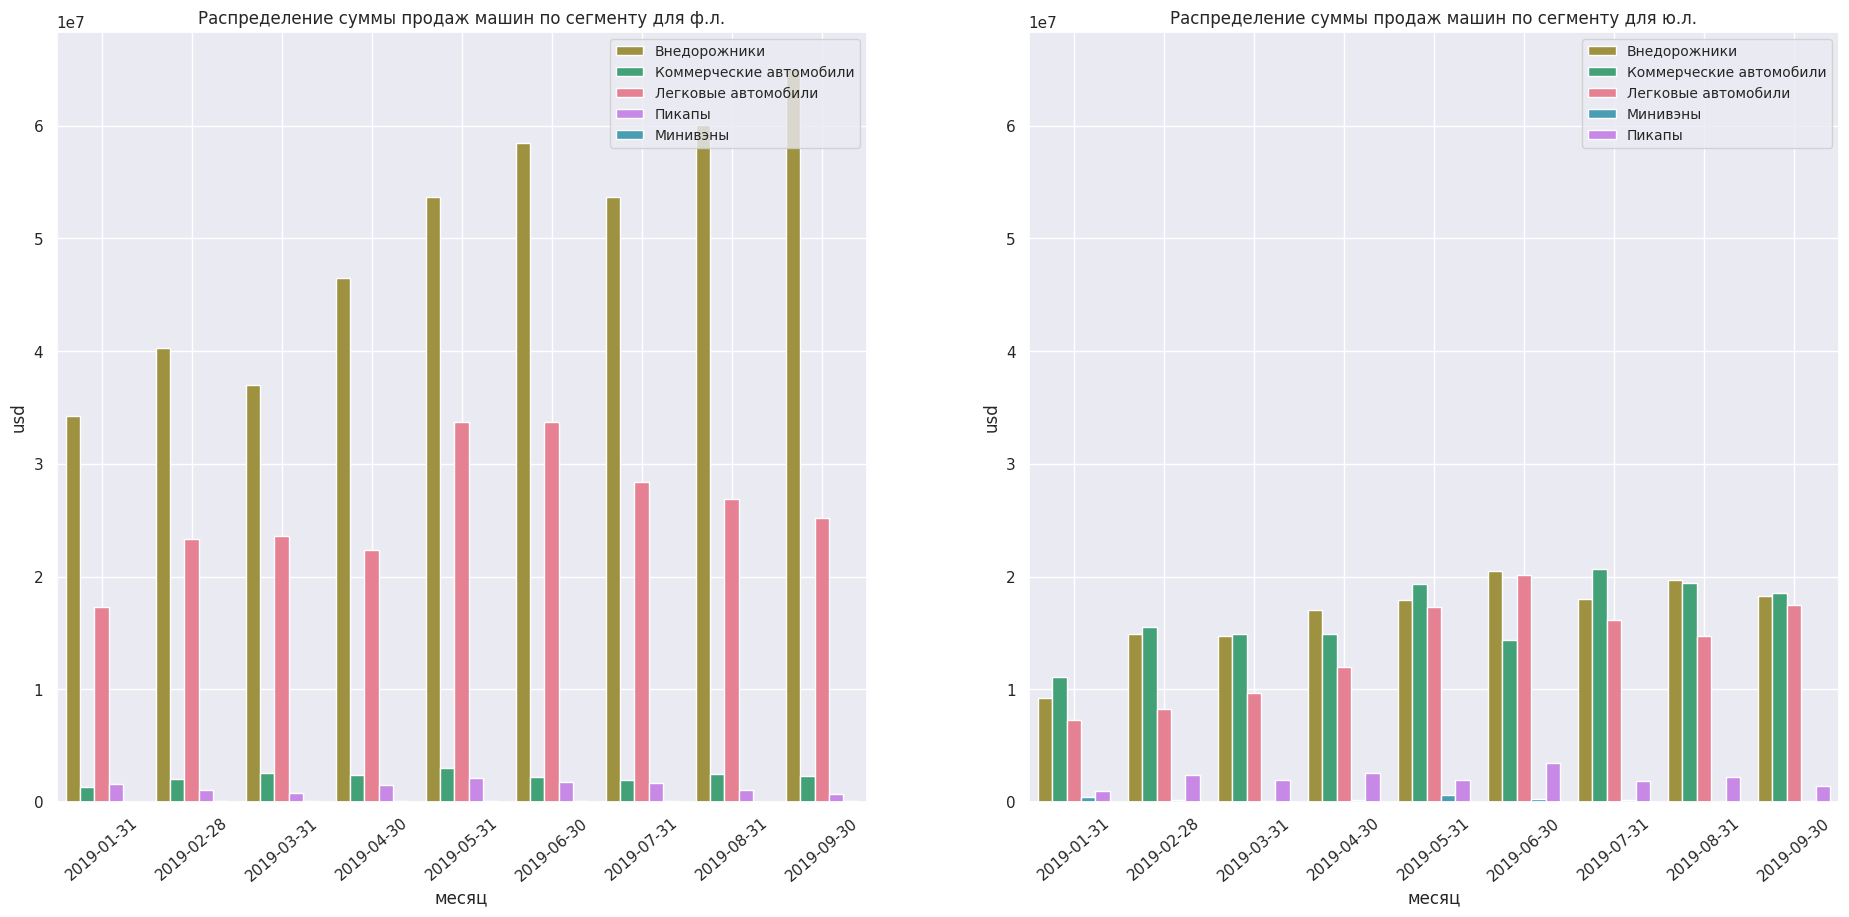

In [622]:
sns_barplot(data_f, data_yu, 'дата', 'продажа_usd', 'сегментация_2013', \
            'Распределение суммы продаж машин по сегменту для ф.л.', 'Распределение суммы продаж машин по сегменту для ю.л.',\
            'месяц', 'usd')

По сумме продаж большую часть вносят внедорожники и легковые. У юр.лиц в зависимости от месяца среди лидеров внедорожники, коммерческие и легковые, их суммы продаж в течении периода различаются не сильно.

#### Продажи по регионам

In [623]:
reg = data_new.pivot_table(index=['регион'], values='количество', aggfunc='sum').\
                          reset_index().sort_values(by='количество', ascending=False)
reg['%'] = round(reg['количество']/reg['количество'].sum(),3)*100
reg[:10]

,регион,количество,%
3,Алматы,11626,26.5
4,Астана,8569,19.5
5,Атырау,3193,7.3
20,Шымкент,2737,6.2
8,Костанай,2660,6.1
6,Караганда,2645,6.0
17,Уральск,1880,4.3
1,Актау,1871,4.3
18,Усть-Каменогорск,1866,4.2
2,Актобе,1609,3.7


46% проданных автомобилей приходится на города: Алматы и Астана.

### Продажи по автоцентрам

In [624]:
# с разделением по тип_клиента
data_new.pivot_table(index='компания', columns = 'тип_клиента', values='количество', aggfunc='sum').\
reset_index().sort_values(by=['физ.лицо'], ascending=False)

тип_клиента,компания,физ.лицо,юр.лицо
17,Toyota Motor Kazakhstan,8092.0,2350.0
1,Astana Motors,4973.0,808.0
21,БИПЭК АВТО,2856.0,9901.0
31,УзАвто-Казахстан,1599.0,128.0
22,Вираж,1375.0,1983.0
10,Nissan Manufacturing RUS,1044.0,717.0
11,Renault Россия,1012.0,72.0
9,Mercur Auto,797.0,378.0
0,Allur Auto,716.0,643.0
24,Лифан Моторс Рус,566.0,NaN


В основном большинсвом по типу покупателей являются физ.лица. Выделить можно  БИПЭК АВТО, Вираж, Автомир ГК- здесь большинсво машин куплено юр.лица. В компаниях которые продают автомобоили из сегментов Большие автобусы, Малотоннажные грузовики,Крупнотоннажные грузовики, Среднетоннажные грузовики, Средние автобусы и т.п. практичестки все покупатели юр.лица

In [625]:
com = data_new.pivot_table(index='компания', values='количество', aggfunc='sum').\
reset_index().sort_values(by=['количество'], ascending=False)
com['%'] = round(com['количество']/com['количество'].sum(),3)*100
com[:10]

,компания,количество,%
21,БИПЭК АВТО,12757,29.0
17,Toyota Motor Kazakhstan,10442,23.8
1,Astana Motors,5781,13.2
22,Вираж,3358,7.6
10,Nissan Manufacturing RUS,1761,4.0
31,УзАвто-Казахстан,1727,3.9
0,Allur Auto,1359,3.1
9,Mercur Auto,1175,2.7
11,Renault Россия,1084,2.5
29,ТК КАМАЗ,888,2.0


66% от общего числа проданных машин, было реализовано компаниями:
БИПЭК АВТО 29.0%,
Toyota Motor Kazakhstan 23.8%,
Astana Motors 13.2%. Mercur Auto 2.7%

In [626]:
data_new.head(1)

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment,transmission_range,drive_range,дата,month
0,Март,Mercur Auto,Audi,A3,2017,DEU,бензин,Алматы,физ.лицо,1,31250,31250,г.Алматы,Легковые автомобили,C класс,0,1.4,small,MT,unkown,2019-03-31,3


In [627]:
q = data_new.pivot_table(index='компания', values='продажа_usd', aggfunc='sum').sort_values(by=['продажа_usd'], ascending=False)
q['%'] = round(q['продажа_usd']/q['продажа_usd'].sum(),3)*100
q[:10]

,продажа_usd,%
компания,,
Toyota Motor Kazakhstan,468633496,40.4
БИПЭК АВТО,154530582,13.3
Astana Motors,128915746,11.1
Вираж,58116890,5.0
ТК КАМАЗ,48666493,4.2
Nissan Manufacturing RUS,43854565,3.8
Mercur Auto,33447381,2.9
Allur Auto,30046207,2.6
Автоцентр-Бавария,24283578,2.1


По сумме продаж та же тройка лидеров, только поменялись местами:
Toyota Motor Kazakhstan 40.4%,
БИПЭК АВТО 13.3%,
Astana Motors 11.1%. Mercur Auto 2.9%

Сохрани топ-10 компаний по продажам, куда входит Mercur Auto, понадобится для дальнейшего анализа.

In [628]:
top_10_copm = q.index[:10].tolist()
top_10_copm

['Toyota Motor Kazakhstan',
 'БИПЭК АВТО',
 'Astana Motors',
 'Вираж',
 'ТК КАМАЗ',
 'Nissan Manufacturing RUS',
 'Mercur Auto',
 'Allur Auto',
 'Автоцентр-Бавария',
 'Jaguar Land Rover']

#### Дополнительные сводные таблицы

In [629]:
r = data_new.pivot_table(index=['v_segment'], values='количество', aggfunc='sum').reset_index()
t = data_new.pivot_table(index=['transmission_range'], values='количество', aggfunc='sum').reset_index()
r

,v_segment,количество
0,extra_small,152
1,small,20661
2,average,18427
3,above_average,2054
4,huge,216


In [630]:
import plotly.graph_objects as go
fig = go.Figure()
pull = [0]*len(r['количество'])
pull[r['количество'].tolist().index(r['количество'].max())] = 0.1
# Список цветов заливки
colors = ['03045e', '023e8a', '0077b6', '00b4d8', '90e0ef', 'ade8f4', 'caf0f8']
fig.add_trace(go.Pie(values=r['количество'], labels=r['v_segment'], pull=pull,
                     marker=dict(colors=colors)))
fig.update_layout(
    title="Распределение количества машин по объему двигателя",
    title_x=0.8,
    margin=dict(l=0, r=0, t=30, b=0),
    legend_orientation="h",
)
fig.show()

Большинство машин имеют объем двигателя "маленький" либо "средний", на остальные категории приходится менее 6%.

In [631]:
import plotly.graph_objects as go
fig = go.Figure()
pull = [0]*len(t['количество'])
pull[t['количество'].tolist().index(t['количество'].max())] = 0.1
# Список цветов заливки
colors = ['03045e', '023e8a', '0077b6', '00b4d8', '90e0ef', 'ade8f4', 'caf0f8']
fig.add_trace(go.Pie(values=t['количество'], labels=t['transmission_range'], pull=pull,
                     marker=dict(colors=colors)))
fig.update_layout(
    title="Распределение кооличества машин по типу коробки передач",
    title_x=0.8,
    margin=dict(l=0, r=0, t=30, b=0),
    legend_orientation="h",
)
fig.show()

Машин с АКПП больше на 17.2%, чем с МКПП.

Дополнительно можем постотреть на распределение продаж по регионам в зависимости от сегмента и бренда авто:

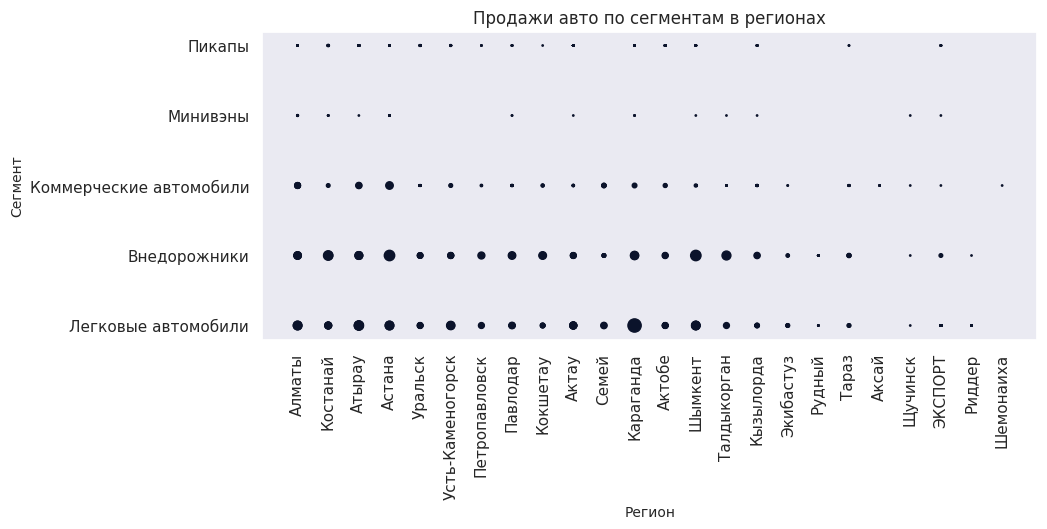

In [632]:
plt.figure(figsize=(10, 4))  # Установка размера графика
plt.scatter(data_new['регион'], data_new['сегментация_2013'],  s=data_new['количество'], c ="#0b132b")
plt.title("Продажи авто по сегментам в регионах")  # Название графика
plt.xlabel('Регион', fontsize=10)  # Название оси x
plt.ylabel('Сегмент', fontsize=10)  # Название оси y

plt.xticks(rotation=90)

plt.show()

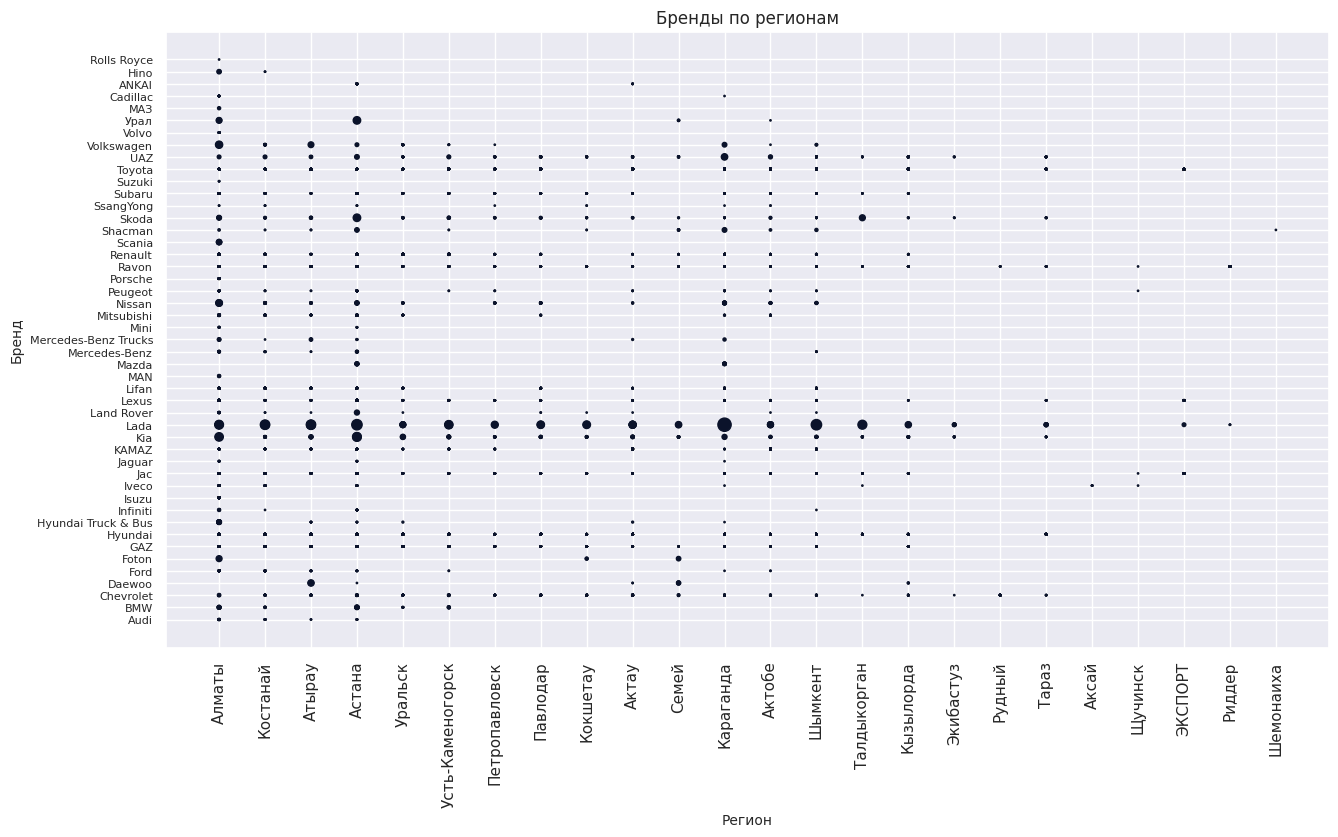

In [633]:
plt.figure(figsize=(15, 8))  # Установка размера графика
plt.scatter(data_new['регион'], data_new['бренд'],  s=data_new['количество'], c="#0b132b")

plt.title("Бренды по регионам")  # Название графика
plt.xlabel('Регион', fontsize=10)  # Название оси x
plt.ylabel('Бренд', fontsize=10)  # Название оси y
plt.grid(visible=True, axis='both')
plt.xticks(rotation=90)
plt.yticks(fontsize=8)

plt.show()

Бренды представленные на рынке несолькими компаниями:

In [634]:
 dil = data_new.pivot_table(index=['бренд'], values='компания', aggfunc='nunique').reset_index()
 dil
 dil.loc[dil['компания']>1]

,бренд,компания
3,Cadillac,2
4,Chevrolet,4
6,Ford,2
8,GAZ,2
11,Hyundai Truck & Bus,2
13,Isuzu,2
23,MAN,2
33,Renault,3
40,Suzuki,2
42,UAZ,2


### Показатели рынка

In [635]:
data_new['количество'].sum()

43953

In [636]:
data_new['бренд'].nunique(), data_new['модель'].nunique()

(47, 294)

На рынке было продано 43953 автомобиля с январь по сентябрь 2019 г 47-ми брендов, 294 различных модели.

#### Прибыль и выручка

По данным заказчика, комиссия дилера Mercur составляет 3%, она заложена в стоимость машины. Создадим столбец с вычисленной комиссией. Столбец бцдет общий, но использовать будем только для этого дилера.

In [637]:
data_new['commission'] = round((data_new['продажа_usd']/1.03)*0.03,0).astype(int)
data_new[:2]

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,регион,тип_клиента,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013,turbo,v,v_segment,transmission_range,drive_range,дата,month,commission
0,Март,Mercur Auto,Audi,A3,2017,DEU,бензин,Алматы,физ.лицо,1,31250,31250,г.Алматы,Легковые автомобили,C класс,0,1.4,small,MT,unkown,2019-03-31,3,910
1,Май,Mercur Auto,Audi,A3,2018,DEU,бензин,Алматы,физ.лицо,1,30581,30581,г.Алматы,Легковые автомобили,C класс,0,1.4,small,MT,fwd,2019-05-31,5,891


Прибыль по рынку Mercur Auto, млн. $:

In [638]:
(data_new.loc[data_new['компания']=='Mercur Auto']['commission'].sum())/1000000

0.974242

In [639]:
e = data_new.query('компания == "Mercur Auto"').pivot_table(index=['бренд'], values='commission', aggfunc='sum').\
reset_index().sort_values(by = 'commission', ascending=False)[:15]
e = e.sort_values(by = 'commission', ascending=True)
e['%'] = round(e['commission']/e['commission'].sum(),3)*100
e

,бренд,commission,%
0,Audi,185136,19.0
1,Porsche,190700,19.6
2,Volkswagen,598406,61.4


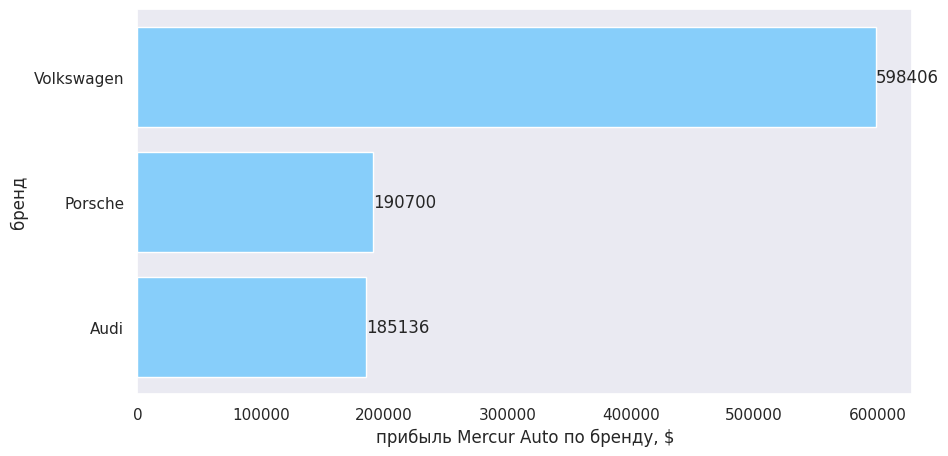

In [640]:
fig, ax = plt.subplots(figsize=(10,5))
bars = plt.barh(e['бренд'], e['commission'], color='lightskyblue')

plt.ylabel('бренд')
plt.xlabel('прибыль Mercur Auto по бренду, $')
ax.bar_label(bars)
plt.show()

Для Mercur Auto наибольшую часть прибыли принес бренд Volkswagen:

Volkswagen	61.4%,
Porsche		19.6%,
Audi	19.0%


Средняя стоимость продажи за период на рынке

In [641]:
data_new.query('компания == "Mercur Auto"')['продажа_usd'].agg(['mean', 'median'])

mean      35582.320213
median    18497.000000
Name: продажа_usd, dtype: float64

Средняя стоимость продажи Mercur Auto значильно выче медианной.

Посмотрим на значения, ограничив количество купленных машин =1.

In [642]:
data_new.loc[data_new['количество']==1].query('компания == "Mercur Auto"')['продажа_usd'].agg(['mean', 'median'])

mean      31197.949943
median    17431.000000
Name: продажа_usd, dtype: float64

Результат тот же.

#### Прибыль по месяцам

In [643]:
u_M = data_new.query('компания == "Mercur Auto"').pivot_table(index=['дата'], values='commission', aggfunc='sum').\
reset_index()
u_M['commission'] =u_M['commission']/1000000
u_M.columns

Index(['дата', 'commission'], dtype='object')

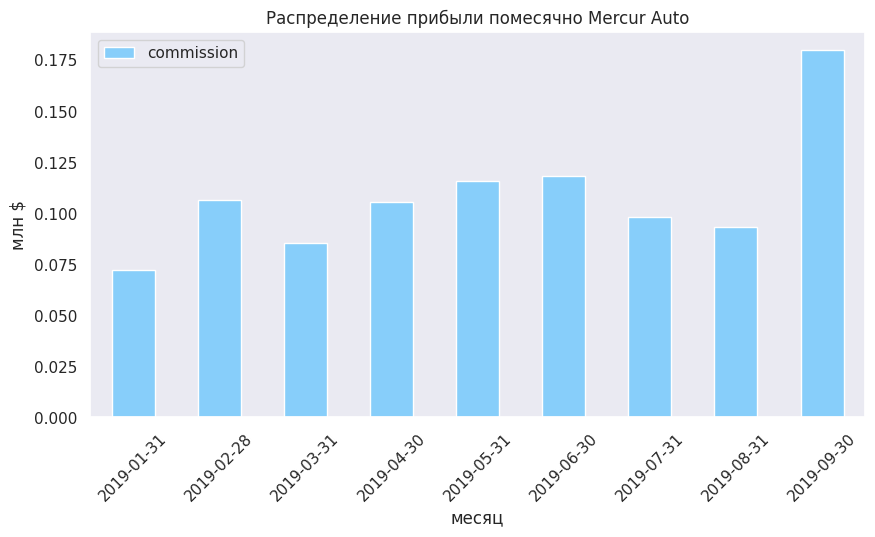

In [644]:
u_M.plot.bar(x='дата', y='commission',figsize=(10,5), rot=45, color='lightskyblue')

plt.title('Распределение прибыли помесячно Mercur Auto')
plt.ylabel('млн $')
plt.xlabel('месяц')
plt.show()

In [645]:
#найдем среднюю и медианную прибыль за месяц
data_new.query('компания == "Mercur Auto"').groupby('дата')['commission'].sum().agg(['mean', 'median'])#.sort_values(by ='mean', ascending=False)

mean      108249.111111
median    105596.000000
Name: commission, dtype: float64

In [646]:
data_new.loc[(data_new['компания']=='Mercur Auto')&(data_new['месяц']=='Сентябрь')&(data_new['модель']=='Polo')].groupby(['v_segment', 'количество'])['количество'].count()#pivot_table(index=['сегментация_2013', 'модель'], values='количество', aggfunc={'количество':'sum'})
#reset_index().sort_values(by='дата', ascending=False)


v_segment      количество
extra_small    1               0
               3               0
small          1             206
               3               1
average        1               0
               3               0
above_average  1               0
               3               0
huge           1               0
               3               0
Name: количество, dtype: int64

Прибыль компании несколько отклоняется в обе стороны от среднего значения, в сентябре наблюдается значительны рост прибыли. Компания продала 206 машин Polo Volkswagen, с маленьким объемом двигателя. Возможно проводились акции для этой модели.

Ниже исследуем продажи в этом сегменте.

In [647]:
u_M = data_new.query('компания == "Mercur Auto"').pivot_table(index=['дата'], values='commission', aggfunc='sum').\
reset_index()

In [648]:
f = data_new.query('компания == "Mercur Auto"').pivot_table(index=['дата','бренд'], values='commission', aggfunc={'commission':'sum'}).\
reset_index().sort_values(by='дата', ascending=False)

f.head()

,дата,бренд,commission
26,2019-09-30,Volkswagen,125392
25,2019-09-30,Porsche,24089
24,2019-09-30,Audi,30221
23,2019-08-31,Volkswagen,41022
22,2019-08-31,Porsche,19104


Значительную прибыль в сентябре принес бренд Volkswagen

In [649]:
fm = data_new.query('компания == "Mercur Auto" and бренд=="Volkswagen"').pivot_table(index=['дата','модель'], values='commission', aggfunc={'commission':'sum'}).\
reset_index().sort_values(by=['дата','commission'], ascending=False)

fm[:10]

,дата,модель,commission
55,2019-09-30,Polo,84555
56,2019-09-30,Tiguan,25051
53,2019-09-30,Jetta,13248
52,2019-09-30,Amarok,1677
54,2019-09-30,Passat B8,861
50,2019-08-31,Polo,20125
51,2019-08-31,Tiguan,16099
49,2019-08-31,Jetta,4798
45,2019-07-31,Polo,20796
46,2019-07-31,Tiguan,14472


А именно модель Polo Volkswagen

In [650]:
data_new.query('компания == "Mercur Auto" and модель =="Polo"').pivot_table(index=['v_segment'], values='commission', aggfunc={'commission':'sum'}).\
reset_index().sort_values(by='commission', ascending=False)

,v_segment,commission
1,small,244313
0,extra_small,0
2,average,0
3,above_average,0
4,huge,0


Сегмент: объем двигателя-маленький (1.2 до 1.8 л). Автомобили с таким объемом двигателя пользуются спросом.

In [651]:
x = data_new.query('компания == "Mercur Auto" and модель =="Polo" and количество <2').pivot_table(index=['дата', 'класс_2013','v_segment'], values='цена_usd', aggfunc={'цена_usd':'mean'}).\
reset_index().sort_values(by='дата', ascending=True)
x

,дата,класс_2013,v_segment,цена_usd
0,2019-01-31,B класс,small,16025.500000
1,2019-03-31,B класс,small,16098.514286
2,2019-04-30,B класс,small,15849.306122
3,2019-05-31,B класс,small,16002.294118
4,2019-06-30,B класс,small,15541.750000
5,2019-08-31,B класс,small,14701.553191
6,2019-09-30,B класс,small,13882.713592


Средняя цена продажи в компании Mercur Auto в течении года на эту модель снижалась. В июле совсем отсутствуют продажи по данной модели. Сравним с ценой по рынку

In [652]:
data_new.query('количество <2 and класс_2013 =="B класс" and v_segment== "small"').pivot_table(index=['дата', 'класс_2013','v_segment'], values='цена_usd', aggfunc={'цена_usd':'mean'}).\
reset_index().sort_values(by='дата', ascending=True)

,дата,класс_2013,v_segment,цена_usd
0,2019-01-31,B класс,small,11247.057416
1,2019-02-28,B класс,small,11349.081897
2,2019-03-31,B класс,small,12171.089600
3,2019-04-30,B класс,small,13295.473322
4,2019-05-31,B класс,small,14849.934820
5,2019-06-30,B класс,small,14192.054705
6,2019-07-31,B класс,small,14301.789644
7,2019-08-31,B класс,small,13961.583569
8,2019-09-30,B класс,small,13892.069717


Как мы видим, средняя цена машинв В-класса и объемом двигателя small, выше средней рыночной в течении года. Только в сентябре он стала ниже рыночной средней. Возможно этим можно объяснить всплекс продаж в сентябре.

Посмотрим на прибыль помесячно для Mercur Auto





In [653]:
f5 = data_new.query('компания == "Mercur Auto"').pivot_table(index=['month','бренд'], values='commission', aggfunc={'commission':'sum'}).\
reset_index().sort_values(by='month', ascending=False)

f5.head()

,month,бренд,commission
26,9,Volkswagen,125392
25,9,Porsche,24089
24,9,Audi,30221
23,8,Volkswagen,41022
22,8,Porsche,19104


In [654]:
fig = px.bar(f5, x = 'month', y = 'commission', color='бренд', \
             color_discrete_sequence=['#03045e', '#023e8a', '#0077b6', '#00b4d8', '#90e0ef', '#ade8f4', '#caf0f8'],\
             text='бренд', height=1000, width=1200
            )
fig.update_layout(title ='Распределение ежемесячной прибыли по брендам Mercur Auto', xaxis_title= 'month',\
                  yaxis_title= 'бренды',\
                  xaxis={'categoryorder':'total descending'}
                  )
fig.show()

Пики прибыли, кроме сентября: февраль за счет роста прибыли по Volkswagen, май за счет Porsche, июнь - Audi и  Porsche.

Посмотрим на модели машин, как менялась их медианная стоимость по месяцам. Ограничим количество машин за одну покупку: 1.


In [655]:
f3 = data_new.query('компания == "Mercur Auto" and количество <2').\
pivot_table(index=['month','бренд'], values='продажа_usd', aggfunc={'продажа_usd':'mean'}).\
reset_index().sort_values(by='month', ascending=False)

f3.head()

,month,бренд,продажа_usd
26,9,Volkswagen,16583.252918
25,9,Porsche,118150.571429
24,9,Audi,64852.000000
23,8,Volkswagen,19836.154930
22,8,Porsche,93699.000000


In [656]:
fig = px.bar(f3, x = 'month', y = 'продажа_usd', color='бренд', \
             color_discrete_sequence=['#03045e', '#023e8a', '#0077b6', '#00b4d8', '#90e0ef', '#ade8f4', '#caf0f8'],\
             text='бренд', height=1000, width=1200
            )
fig.update_layout(title ='Распределение средней стоимости продажи по брендам Mercur Auto', xaxis_title= 'month',\
                  yaxis_title= 'бренды',\
                  xaxis={'categoryorder':'total descending'}
                  )
fig.show()

Нельзя сказать, что средняя стоимость в февраль, май и июнь сильно упала, значит прибыль сложилась за счет количества купленных машин. Посмотрим на покупки в эти месяцы.

In [657]:
data_new.query('компания == "Mercur Auto" ').pivot_table(index=['month','бренд'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='month', ascending=False)

,month,бренд,количество
26,9,Volkswagen,260
25,9,Porsche,7
24,9,Audi,16
23,8,Volkswagen,71
22,8,Porsche,7
21,8,Audi,15
20,7,Volkswagen,79
19,7,Porsche,10
18,7,Audi,9
17,6,Volkswagen,104


Действительно, такая прибыль за счет количества. В июле и августе можно было получить прибыль больше, но за счет того, что продажи Volkswagen просели, прибыль в целом снизилась. С июня по август, мы помним, что спрос на легковые упал по рынку.

Можем посмотреть так же на среднюю стоимость по моделям Volkswagen

In [658]:
f4 = data_new.query('компания == "Mercur Auto" and бренд == "Volkswagen" and количество<2').pivot_table(index=['month','модель'], values='commission', aggfunc={'commission':'sum'}).\
reset_index().sort_values(by='month', ascending=False)

f4.head()

,month,модель,commission
53,9,Tiguan,25051
52,9,Polo,83338
51,9,Passat B8,861
50,9,Jetta,13248
49,9,Amarok,1677


In [659]:
fig = px.bar(f4, x = 'month', y = 'commission', color='модель', \
             color_discrete_sequence=['#03045e', '#023e8a', '#0077b6', '#00b4d8', '#90e0ef', '#ade8f4', '#caf0f8'],\
             text='модель', height=1000, width=1200
            )
fig.update_layout(title ='Распределение средней стоимости продажи по моделям Mercur Auto', xaxis_title= 'month',\
                  yaxis_title= 'модель',\
                  xaxis={'categoryorder':'total descending'}
                  )
fig.show()

Тут можно добавить, что в пики прибыли продавались машины более дорогих классов.

Подведем кратко итоги:

Лидеры:

Лидеры-бренды по количеству проданных машин:
-  Lada-9667 машин, 22% от всего количества.
- Toyota	9374 - 21.3%
- Hyundai 5703- 13%

Меньше всего продано машин брендов Rolls Royce-1 машина, Suzuki-3 машин, МАЗ-8 машин.
В целом по рынку, лидеры страны-производители те же.
Лидеры-бренды по сумме продаж:
-  Toyota 383.88 млн$-33.11% от общей суммы

-  Hyundai 124.85млн$-10.77%

- Lada 94.26млн$-8.13%

Наименьшая сумма продаж у брендов:
- Mini 0.42 млн$- 0.04%

- SsangYong 0.24 млн$- 0.02%

- Suzuki 0.07 млн$- 0.01%

Модели машин, с наибольшей суммой продаж:

- Camry 115.88 млн$ - 9.99% от общей суммы,

- LC Prado 83.59 млн$ - 7.21%,

- Land Cruiser 200 73.60 млн$ - 6.35%.

Модели машин, с наибольшим количество проданных машин:

- Camry 3440 машин-7.83% от общего числа

- Granta 2771машин-6.30%

- Lada 4x4 2329машин-5.30%

### Компания Mercur Auto

Полная информация, в т.ч. рассчитаные выше показатели рынка.

In [660]:
b1 = data_new.query('компания == "Mercur Auto"').pivot_table(index=['бренд'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)
b1['%']=round(b1['количество']/b1['количество'].sum(),3)*100
b1

,бренд,количество,%
2,Volkswagen,1009,85.9
0,Audi,106,9.0
1,Porsche,60,5.1


Наиболее часто продаваемый бренд машин Volkswagen - 85.9%

In [661]:
b = data_new.query('компания == "Mercur Auto"').\
pivot_table(index='бренд', values='продажа_usd', aggfunc='sum').reset_index().sort_values(by=['продажа_usd'], ascending=False)
b['%']=round(b['продажа_usd']/b['продажа_usd'].sum(),3)*100
b

,бренд,продажа_usd,%
2,Volkswagen,20543677,61.4
1,Porsche,6547383,19.6
0,Audi,6356321,19.0


61.4% от общей сумму продаж приходится на Volkswagen.

In [662]:
k1 = data_new.query('компания == "Mercur Auto"').pivot_table(index=['модель'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)
k1['%']=round(k1['количество']/k1['количество'].sum(),3)*100
k1

,модель,количество,%
17,Polo,673,57.3
20,Tiguan,161,13.7
12,Jetta,118,10.0
4,A6,50,4.3
10,Cayenne,32,2.7
18,Q5,30,2.6
23,Transporter Kasten,17,1.4
15,Panamera,14,1.2
16,Passat B8,13,1.1
13,Macan,11,0.9


Наиболее часто продаваемые модели:
* Polo - 57.3%
* Tiguan - 13.7%
* Jetta - 10%

In [663]:
k = data_new.query('компания == "Mercur Auto"').\
pivot_table(index='модель', values='продажа_usd', aggfunc='sum').reset_index().\
sort_values(by=['продажа_usd'], ascending=False)
k['%']=round(k['продажа_usd']/k['продажа_usd'].sum(),3)*100
k

,модель,продажа_usd,%
17,Polo,10020438,30.0
20,Tiguan,5532939,16.5
10,Cayenne,3220758,9.6
12,Jetta,2408930,7.2
4,A6,2402203,7.2
15,Panamera,2085442,6.2
18,Q5,1558834,4.7
6,A8,1160350,3.5
19,Q7,939937,2.8
13,Macan,758664,2.3


Лидеры по сумме продаж, модели:
* Polo	30%
* Tiguan	16.5%
* Cayenne	9.6%

In [664]:
n = data_new.query('компания == "Mercur Auto"').pivot_table(index=['класс_2013'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)
n['%']=round(n['количество']/n['количество'].sum(),3)*100
n

,класс_2013,количество,%
0,B класс,673,57.3
6,Компактные SUV,172,14.6
1,C класс,122,10.4
11,Стандартные SUV,52,4.4
3,E класс,51,4.3
10,Среднеразмерные SUV,30,2.6
4,F класс,22,1.9
7,Микроавтобусы,18,1.5
2,D класс,14,1.2
8,Полноразмерный Минивэн,9,0.8


Более половины проданных машин, 57.3%, относятся к классу - В-класс.

In [665]:
n1 = data_new.query('компания == "Mercur Auto"').pivot_table(index=['класс_2013'], values='продажа_usd', aggfunc={'продажа_usd':'sum'}).\
reset_index().sort_values(by='продажа_usd', ascending=False)
n1['%']=round(n1['продажа_usd']/n1['продажа_usd'].sum(),3)*100
n1

,класс_2013,продажа_usd,%
0,B класс,10020438,30.0
6,Компактные SUV,6291603,18.8
11,Стандартные SUV,4664886,13.9
4,F класс,3245792,9.7
1,C класс,2532457,7.6
3,E класс,2472568,7.4
10,Среднеразмерные SUV,1558834,4.7
7,Микроавтобусы,678704,2.0
9,Спортивные автомобили,535280,1.6
8,Полноразмерный Минивэн,531825,1.6


Но сумма продаж машин В-класса всего 30% от общей суммы.

In [666]:
a1 = data_new.query('компания == "Mercur Auto"').pivot_table(index=['сегментация_2013'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)
a1['%']=round(a1['количество']/a1['количество'].sum(),3)*100
a1

,сегментация_2013,количество,%
2,Легковые автомобили,886,75.4
0,Внедорожники,254,21.6
1,Коммерческие автомобили,18,1.5
3,Минивэны,9,0.8
4,Пикапы,8,0.7


В основном продавали автомобили сегмента Легковые автомобили (75.4%) и Внедорожники(21.6%)

In [667]:
a2 = data_new.query('компания == "Mercur Auto"').pivot_table(index=['сегментация_2013'], values='продажа_usd', aggfunc={'продажа_usd':'sum'}).\
reset_index().sort_values(by='продажа_usd', ascending=False)
a2['%']=round(a2['продажа_usd']/a2['продажа_usd'].sum(),3)*100
a2

,сегментация_2013,продажа_usd,%
2,Легковые автомобили,19287766,57.7
0,Внедорожники,12515323,37.4
1,Коммерческие автомобили,678704,2.0
3,Минивэны,531825,1.6
4,Пикапы,433763,1.3


По сумме продаж так же лидирую Легковые автомобили и Внедорожники, но разница в % между ними сократилась из-за более высокой стоимости Внедорожников.

In [668]:
data_new.query('компания == "Mercur Auto" and сегментация_2013=="Внедорожники"').pivot_table(index=['v_segment'], values='продажа_usd', aggfunc={'продажа_usd':'sum'}).\
reset_index().sort_values(by='продажа_usd', ascending=False)

,v_segment,продажа_usd
2,average,9461208
3,above_average,1273056
1,small,297853
0,extra_small,0
4,huge,0


Большинство проданных Внедорожников с объемом двигателя average.

In [669]:
data_new.query('компания == "Mercur Auto"').groupby('область')['количество'].count().sort_values(ascending=False)#количество продаж машин по областям

область
г.Алматы                          458
Атырауская область                122
г.Астана                          112
Костанайская область              107
Карагандинская область             93
Западно-Казахстанская область      34
Южно-Казахстанская область          7
Восточно-Казахстанская область      5
Актюбинская область                 1
Северо-Казахстанская область        1
Name: количество, dtype: int64

In [670]:
#количество проданных машин по областям
b6 = data_new.query('компания == "Mercur Auto"').pivot_table(index=['область'], values='количество', aggfunc={'количество':'sum'}).\
reset_index().sort_values(by='количество', ascending=False)
b6['%']=round(b6['количество']/b6['количество'].sum(),3)*100
b6

,область,количество,%
8,г.Алматы,635,54.0
1,Атырауская область,149,12.7
9,г.Астана,119,10.1
5,Костанайская область,113,9.6
4,Карагандинская область,106,9.0
3,Западно-Казахстанская область,35,3.0
7,Южно-Казахстанская область,11,0.9
2,Восточно-Казахстанская область,5,0.4
0,Актюбинская область,1,0.1
6,Северо-Казахстанская область,1,0.1


Основные регионы по количеству проданных машин:г.Алматы	54.0%,
Атырауская область	12.7%,
г.Астана 10.1%,
Костанайская область	9.6%,
Карагандинская область 9%.

In [671]:
data_new.query('компания == "Mercur Auto"').groupby('количество')['количество'].count()#статистика по количеству машин за 1 покупку

количество
1     879
2      28
3      10
4       3
5       5
6       3
7       3
8       1
9       1
10      1
11      1
14      1
17      1
18      1
20      1
27      1
Name: количество, dtype: int64

Чаще всего покупалась машин в количестве-1.

In [672]:
data_new.query('компания == "Mercur Auto"').groupby(['бренд','тип_клиента'])['продажа_usd'].sum()#бренды и сумма продаж проданных машин по типу клиента

бренд       тип_клиента
Audi        физ.лицо        4763330
            юр.лицо         1592991
Porsche     физ.лицо        6547383
Volkswagen  физ.лицо       13922039
            юр.лицо         6621638
Name: продажа_usd, dtype: int64

Основные покупатели-физ.лица

### Конкуренты Mercur Auto

Вспомним лиредов продаж по количеству и по сумме продаж

In [673]:
m1 = data_new.pivot_table(index='компания', values='продажа_usd', aggfunc='sum').sort_values(by=['продажа_usd'], ascending=False).\
reset_index().sort_values(by=['продажа_usd'], ascending=False)
m1['доля'] = round(m1['продажа_usd']/m1['продажа_usd'].sum(),3)*100
top_comp = m1['компания'][:10]
m1[:10]

,компания,продажа_usd,доля
0,Toyota Motor Kazakhstan,468633496,40.4
1,БИПЭК АВТО,154530582,13.3
2,Astana Motors,128915746,11.1
3,Вираж,58116890,5.0
4,ТК КАМАЗ,48666493,4.2
5,Nissan Manufacturing RUS,43854565,3.8
6,Mercur Auto,33447381,2.9
7,Allur Auto,30046207,2.6
8,Автоцентр-Бавария,24283578,2.1
9,Jaguar Land Rover,17631106,1.5


In [674]:
m2 = data_new.pivot_table(index='компания', values='количество', aggfunc='sum').sort_values(by=['количество'], ascending=False).\
reset_index().sort_values(by=['количество'], ascending=False)
m2['доля'] = round(m2['количество']/m2['количество'].sum(),3)*100
m2[:10]

,компания,количество,доля
0,БИПЭК АВТО,12757,29.0
1,Toyota Motor Kazakhstan,10442,23.8
2,Astana Motors,5781,13.2
3,Вираж,3358,7.6
4,Nissan Manufacturing RUS,1761,4.0
5,УзАвто-Казахстан,1727,3.9
6,Allur Auto,1359,3.1
7,Mercur Auto,1175,2.7
8,Renault Россия,1084,2.5
9,ТК КАМАЗ,888,2.0


Создадим списки с  классами автомобилей, которые чаще всего продаются и с регионами, где представлена компания Mercur Auto

In [675]:
list2 = data_new.query('компания == "Mercur Auto"')['регион'].unique()
list3 = ['B класс','Компактные SUV', 'C класс' ]

Сгруппируем данные и найдем компании, которые представлены в тех же регионах и реализуют те же классы авто. Ограничим компании списком top_comp(лидеры по продажам)

In [676]:
data_new.query('класс_2013 in @list3 and регион in @list2 and компания in @top_comp').pivot_table(index=['регион',  'класс_2013'],columns = 'компания', values='количество', aggfunc='sum',fill_value=0)

компания                         Allur Auto  Astana Motors  Jaguar Land Rover  \
регион           класс_2013                                                     
Актобе           B класс                  3             28                  0   
                 C класс                  0             30                  0   
                 Компактные SUV          23             44                  1   
Алматы           B класс                 37            506                  0   
                 C класс                  0            413                  1   
                 Компактные SUV         122            524                  6   
Астана           B класс                 52            297                  0   
                 C класс                 22            316                  1   
                 Компактные SUV         245            541                  5   
Атырау           B класс                  2             51                  0   
                 C класс                  0             62                  0   
                 Компактные SUV          31            102                  0   
Караганда        B класс                  8             53                  0   
                 C класс                  0             28                  0   
                 Компактные SUV          62             84                  0   
Костанай         B класс                  4             52                  0   
                 C класс                  0             49                  0   
                 Компактные SUV         164            122                  0   
Петропавловск    B класс                  3              8                  0   
                 C класс                  0              2                  0   
                 Компактные SUV          23              4                  0   
Уральск          B класс                  0             36                  0   
                 C класс                  0             36                  0   
                 Компактные SUV          23             79                  0   
Усть-Каменогорск B класс                  2             27                  0   
                 C класс                  0             14                  0   
                 Компактные SUV          26             58                  0   
Шымкент          B класс                  3            121                  0   
                 C класс                  0             87                  0   
                 Компактные SUV         102            157                  0   

компания                         Mercur Auto  Nissan Manufacturing RUS  \
регион           класс_2013                                              
Актобе           B класс                   0                         0   
                 C класс                   0                        10   
                 Компактные SUV            0                        23   
Алматы           B класс                 334                         0   
                 C класс                  53                       252   
                 Компактные SUV           75                       187   
Астана           B класс                  70                         0   
                 C класс                  16                        58   
                 Компактные SUV           20                        81   
Атырау           B класс                 109                         0   
                 C класс                  24                        15   
                 Компактные SUV           12                        29   
Караганда        B класс                  80                         0   
                 C класс                   6                        27   
                 Компактные SUV           20                        28   
Костанай         B класс                  47                         0   
                 C класс                  16                        21   
 

Основные конкуренты Mercur Auto с учетом класса и региона:
- Allur Auto,

- Astana Motors,

- Nissan Manufacturing RUS,

- Toyota Motor Kazakhstan,

- БИПЭК АВТО.

Jaguar Land Rover, Автоцентр-Бавария можно исключить-у них очень мало продаж в этих регионах.

In [677]:
data_m = data_new.query('класс_2013 in @list3 and регион in @list2 and компания in @top_comp')

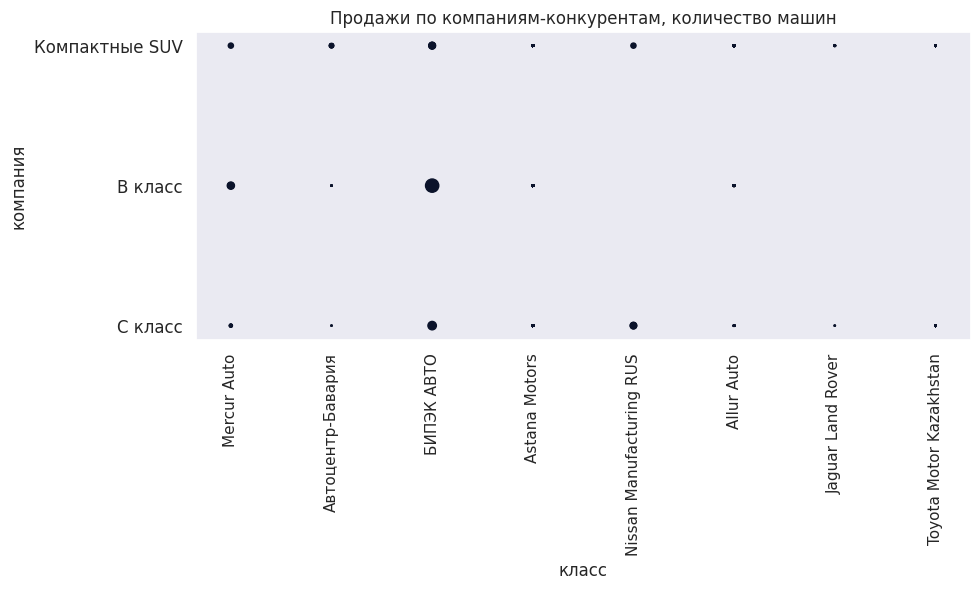

In [678]:
plt.figure(figsize=(10, 4))  # Установка размера графика
plt.scatter(data_m['компания'], data_m['класс_2013'],  s=data_m['количество'], c="#0b132b")

plt.title("Продажи по компаниям-конкурентам, количество машин")  # Название графика
plt.xlabel('класс', fontsize=12)  # Название оси x
plt.ylabel('компания', fontsize=12)  # Название оси y

plt.xticks(rotation=90)
plt.yticks(fontsize=12)

plt.show()

Итак,

Лидеры-бренды по количеству проданных машин:
-  Lada-9667 машин, 22% от всего количества.
- Toyota	9374 - 21.3%
- Hyundai 5703- 13%

Меньше всего продано машин брендов Rolls Royce-1 машина, Suzuki-3 машин, МАЗ-8 машин.
В целом по рынку, лидеры страны-производители те же.
Лидеры-бренды по сумме продаж:
-  Toyota 383.88 млн$-33.11% от общей суммы

-  Hyundai 124.85млн$-10.77%

- Lada 94.26млн$-8.13%

Наименьшая сумма продаж у брендов:
- Mini 0.42 млн$- 0.04%

- SsangYong 0.24 млн$- 0.02%

- Suzuki 0.07 млн$- 0.01%

Модели машин, с наибольшей суммой продаж:

- Camry 115.88 млн$ - 9.99% от общей суммы,

- LC Prado 83.59 млн$ - 7.21%,

- Land Cruiser 200 73.60 млн$ - 6.35%.

Модели машин, с наибольшим количество проданных машин:

- Camry 3440 машин-7.83% от общего числа

- Granta 2771машин-6.30%

- Lada 4x4 2329машин-5.30%


Немного статистики:

В основном купленные авто, из топ-7(количество проданных машин) брендов, были новыми (2018 г.в.). Основные страны-производители: Казахстан, Россия и Япония.

Большинство машин имеют объем двигателя "маленький" либо "средний", на остальные категории приходится менее 6%.

Машин с АКПП больше на 17.2%, чем с МКПП.

56% от количества проданных машин приходится на физ.лиц и 62 % от общей суммы продаж. Физ.лица выбирают более дорогие модели машин. У юр.лиц на первом месте бренд Lada. (машины бренда Lada почти в 3 раза дешевле машин бренда Toyota)

- Lada 42.2%, Toyota 11.2%, Kia 6.4% - бренды лидеры по количеству проданных машин у юр.лиц

- Toyota 38.9%, Hyundai 26.8%, Ravon 8.6% - бренды лидеры по количеству проданных машин у физ.лиц.

Динамика продаж:

Наблюдается рост спроса на внедорожники в течение года, особенно к осени, в следствии чего увеличиваются продажи машин с двигателем "среднего" объема в августе(в сентябре спрос падает, не смотря на снижение средней цены на ключевые модели), в сентябре преобладают внедорожники с маленьким объемом(за счет моделей Creta и lada 4х4). К осени снижаются продажи легковых автомобилей. В июле наблюдаем сезонное снижение общего спроса на автомобили. По году выпуска можно сказать, что стремительное падение количества машин 2017 г.в. связано с сокращением их количества в целом, возможно в начале года дилеры распродавали их с дополнительными бонусами, чтобы освободить метсо для завоза машин 2018 г.в.

По остальным характеристикам, в целом, изменения незначительные за данный период.

В разрезе тип клиента:

физ.лица:
* Количество купленных машин на бензине физ.лицами в течении года колеблется, но в целом растет.
* С мая заметно возрастает спрос на машины с объемом двигателей "средний" , а спрос на машины с од "маленький" проседает летом.
* Так же появляется небольшой спрос на машины с объемом двигателя "очень маленький" в летние месяца.
* К осени растет спрос на внедорожники и падает на легковые автомобили.

юр.лица:
* Количество купленных машин на бензине в течении года для юр.лиц рост более равномерный, чем у физ.лиц.
* В целом идет рост спроса машин по всем видам объема двигателя, спад наблюдается по всем летом, кроме машин с объемом двигателя "выше среднего" и "очень большой". Возможно связо с обновлениями автопарка к лету, к туристическому сезону.
* К осени растет спрос на легковые и чаще всего это машины с "маленьким" объемом двигателя.

География:
46% проданных автомобилей приходится на города: Алматы и Астана.


Продажи по компаниям:
66% от общего числа проданных машин, было реализовано компаниями: - БИПЭК АВТО 29.0%

- Toyota Motor Kazakhstan 23.8%

- Astana Motors 13.2%

- Mercur Auto 2.7%

По сумме продаж та же тройка лидеров, только поменялись местами:

- Toyota Motor Kazakhstan 40.4%
- БИПЭК АВТО 13.3%
- Astana Motors 11.1%
- Mercur Auto 2.9%.


Прибыль по рынку Mercur Auto, млн. $:0.974242
Наибольшую часть прибыли принес бренд Volkswagen(модель Polo):

Volkswagen 61.4%, Porsche 19.6%, Audi 19.0%

Из рекомендаций компании Mercur Auto:
* Отслеживать цены в регионе на подобные модели у конкурентов. При снижении цен на популярные классы автомобилей наблюдаем рост продаж (сентябрь)
* Искать выходд на компании такси и каршеринг, для реализации больших партий машин
* В сезон спада спроса на машины(август), возможно стимулировать к покупке бонусами/акциями.
* Возможно разширить ассортимент за счет нового бренда(например Opel), особенно обратить внимание на легковые автомобили B-класс с объемом двигателя 1.2-1.8, бензин и Компактные SUV, с объемом двигателя 1.8-3.5, бензин.
* Рассмотреть необходимость довабления в ассортимент модель Teramont Volswagen. Так как класс этой модели (Полноразмерные SUV) - лидер по сумме продаж.  

In [679]:
data_new.pivot_table(index='класс_2013', values='продажа_usd', aggfunc='sum').sort_values(by=['продажа_usd'], ascending=False).\
reset_index().sort_values(by=['продажа_usd'], ascending=False)[:7]

,класс_2013,продажа_usd
0,Полноразмерные SUV,155007645
1,Компактные SUV,148809183
2,B класс,137857451
3,E класс,132592920
4,Стандартные SUV,128704759
5,Среднеразмерные SUV,107372620
6,Крупнотоннажные грузовики,77330346


In [680]:
data_new.pivot_table(index='класс_2013', values='количество', aggfunc='sum').sort_values(by=['количество'], ascending=False).\
reset_index().sort_values(by=['количество'], ascending=False)[:7]

,класс_2013,количество
0,B класс,12120
1,Компактные SUV,5685
2,Субкомпактные SUV,4515
3,E класс,3831
4,C класс,3730
5,Среднеразмерные SUV,3138
6,Стандартные SUV,2518
